<a href="https://colab.research.google.com/github/SrvPioneer/Supervised-Machine-Learning-Regression-Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project** **Title** : <u/>Seoul Bike Sharing Demand Prediction<u/>

## <b>Problem Description

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##<b>Data Description

###<b> This data contains weathers information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall) the number of bike rented per hour and date informeation.

##<b> Attribute Information:



* ### Date : year-month-day
* ### Rented Bike count : Count of bike rented at each hour
* ### Hour :Hour of the day
* ### Temperature : Temperature in celsius
* ### Humidity : %
* ### Windspeed : m/s
* ### VIsibility : 10m
* ### Dewpoint Temperature: Celsius
* ### Solar Radiation : MJ/m2
* ### Rainfall :mm
* ### Snowfall : cm
* ### Seasons : Winter, Spring, Summer, Autumn
* ### Hoiday : Holiday/ No Holiday
* ### Funtional Day : NonFunc(Non Functional hours), Fun(Functional hours)








In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

##<b> Data Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Supervised ML Regression( Bike Sharing Demand Prediction)/SeoulBikeData.csv", encoding = "unicode_escape")

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data do not have any null value

In [ ]:
#Rename columns
dataset = dataset.rename(columns= {"Rented Bike Count" : "Rented_Bike_count", "Temperature(°C)" : "Temperature", "Humidity(%)": "Humidity", "Wind speed (m/s)":"Wind_speed",
"Visibility (10m)" : "Visibility", "Dew point temperature(°C)": "Dew_point_temperature", "Solar Radiation (MJ/m2)":"Solar_Radiation", "Rainfall(mm)": "Rainfall", 
"Snowfall (cm)": "Snowfall","Functioning Day": "Functioning_Day"})

In [ ]:
dataset.describe(include= "all")

Date  Rented_Bike_count         Hour  Temperature     Humidity  \
count         8760        8760.000000  8760.000000  8760.000000  8760.000000   
unique         365                NaN          NaN          NaN          NaN   
top     01/12/2017                NaN          NaN          NaN          NaN   
freq            24                NaN          NaN          NaN          NaN   
mean           NaN         704.602055    11.500000    12.882922    58.226256   
std            NaN         644.997468     6.922582    11.944825    20.362413   
min            NaN           0.000000     0.000000   -17.800000     0.000000   
25%            NaN         191.000000     5.750000     3.500000    42.000000   
50%            NaN         504.500000    11.500000    13.700000    57.000000   
75%            NaN        1065.250000    17.250000    22.500000    74.000000   
max            NaN        3556.000000    23.000000    39.400000    98.000000   

         Wind_speed   Visibility  Dew_point_temperature  Solar_Radiation  \
count   8760.000000  8760.000000            8760.000000      8760.000000   
unique          NaN          NaN                    NaN              NaN   
top             NaN          NaN                    NaN              NaN   
freq            NaN          NaN                    NaN              NaN   
mean       1.724909  1436.825799               4.073813         0.569111   
std        1.036300   608.298712              13.060369         0.868746   
min        0.000000    27.000000             -30.600000         0.000000   
25%        0.900000   940.000000              -4.700000         0.000000   
50%        1.500000  1698.000000               5.100000         0.010000   
75%        2.300000  2000.000000              14.800000         0.930000   
max        7.400000  2000.000000              27.200000         3.520000   

           Rainfall     Snowfall Seasons     Holiday Functioning_Day  
count   8760.000000  8760.000000    8760        8760            8760  
unique          NaN          NaN       4           2               2  
top             NaN          NaN  Spring  No Holiday             Yes  
freq            NaN          NaN    2208        8328            8465  
mean       0.148687     0.075068     NaN         NaN             NaN  
std        1.128193     0.436746     NaN         NaN             NaN  
min        0.000000     0.000000     NaN         NaN             NaN  
25%        0.000000     0.000000     NaN         NaN             NaN  
50%        0.000000     0.000000     NaN         NaN             NaN  
75%        0.000000     0.000000     NaN         NaN             NaN  
max       35.000000     8.800000     NaN         NaN             NaN

In [ ]:
#duplicate
len(dataset[dataset.duplicated()])

0

### No duplicate value present in dataset

###<b> Exploratory Data Analysis

In [ ]:
dataset["Rented_Bike_count"].head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    490
Name: Rented_Bike_count, dtype: int64

In [ ]:
#Convert date column into data time datatype and create three new columns
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["Day"] = dataset["Date"].dt.day
dataset["Month"] = dataset["Date"].dt.month
dataset["Year"] = dataset["Date"].dt.year

In [ ]:
dataset

Date  Rented_Bike_count  Hour  Temperature  Humidity  Wind_speed  \
0    2017-01-12                254     0         -5.2        37         2.2   
1    2017-01-12                204     1         -5.5        38         0.8   
2    2017-01-12                173     2         -6.0        39         1.0   
3    2017-01-12                107     3         -6.2        40         0.9   
4    2017-01-12                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  Day  Month  Year  
0     Winter  No Holiday             Yes   12      1  2017  
1     Winter  No Holiday             Yes   12      1  2017  
2     Winter  No Holiday             Yes   12      1  2017  
3     Winter  No Holiday             Yes   12      1  2017  
4     Winter  No Holiday             Yes   12      1  2017  
...      ...         ...             ...  ...    ...   ...  
8755  Autumn  No Holiday             Yes   30     11  2018  
8756  Autumn  No Holiday             Yes   30     11  2018  
8757  Autumn  No Holiday             Yes   30     11  2018  
8758  Autumn  No Holiday             Yes   30     11  2018  
8759  Autumn  No Holiday             Yes   30     11  2018  

[8760 rows x 17 columns]

In [ ]:
dataset.columns

Index(['Date', 'Rented_Bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day',
       'Month', 'Year'],
      dtype='object')

##<b> Univariate Analysis

In [ ]:
categorical_features = dataset.describe(include = ["object", "category"]).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

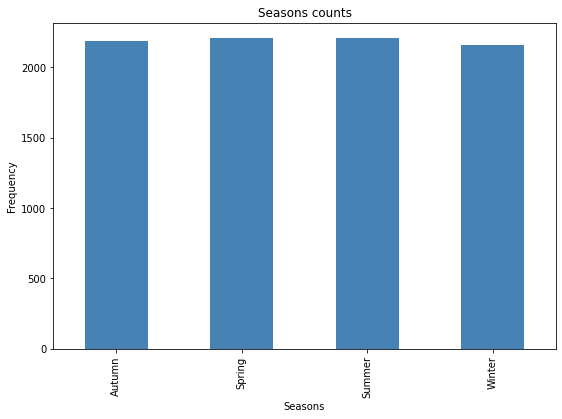

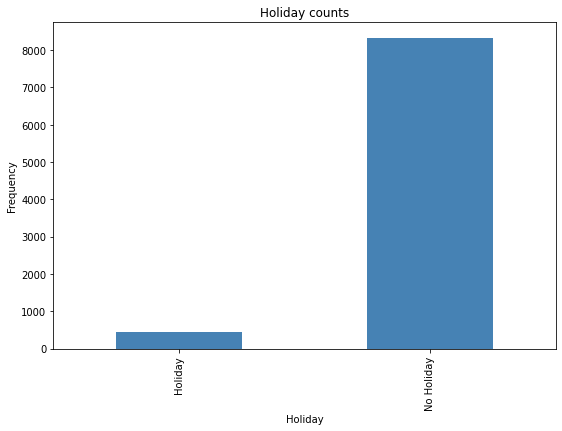

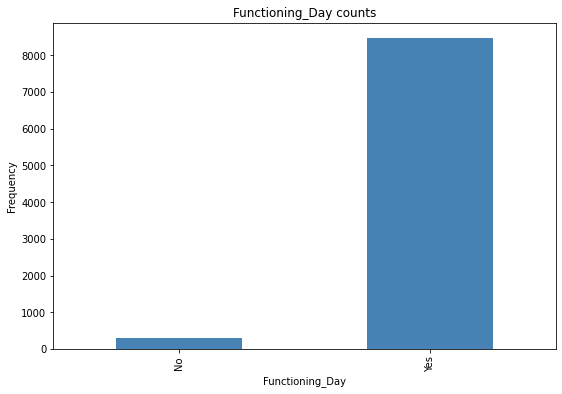

In [ ]:
#Bar plot for categorical variable
for col in categorical_features:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = plt.gca()
  counts.plot.bar(ax = ax, color = "steelblue")
  ax.set_title(col + " counts")
  ax.set_xlabel(col)
  ax.set_ylabel("Frequency")
plt.show()

In [ ]:
dataset["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
dataset["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
dataset["Functioning_Day"].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

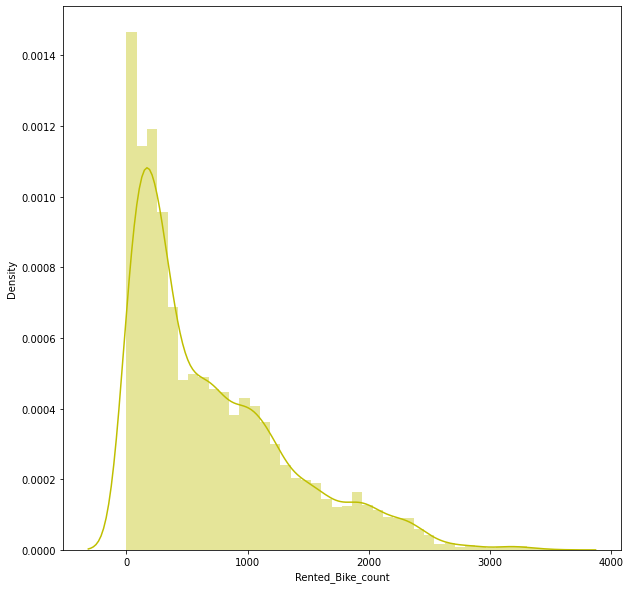

In [ ]:
#Dependent variable observation
plt.figure(figsize =(10,10))
sns.distplot(dataset["Rented_Bike_count"],  color = "y")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented_Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Day', 'Month', 'Year'],
      dtype='object')

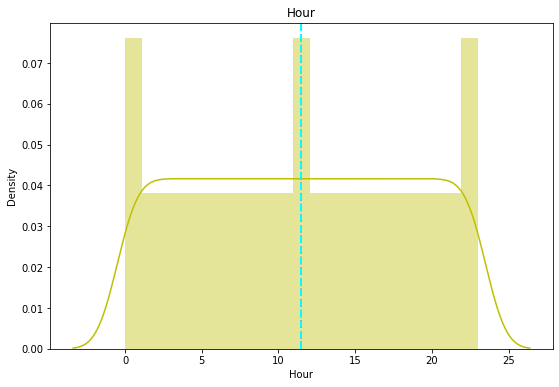

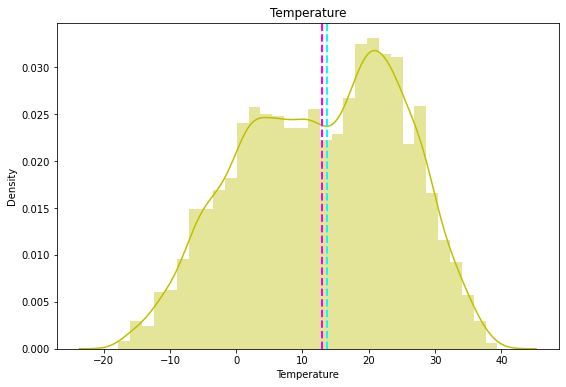

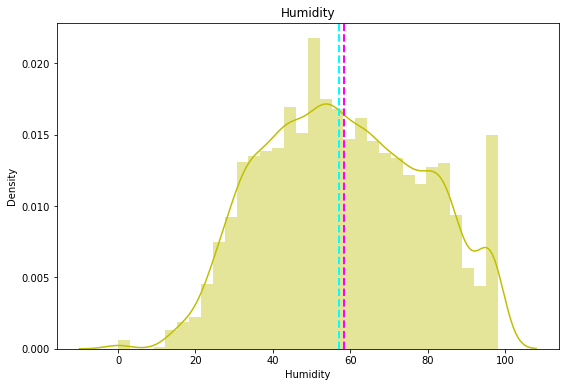

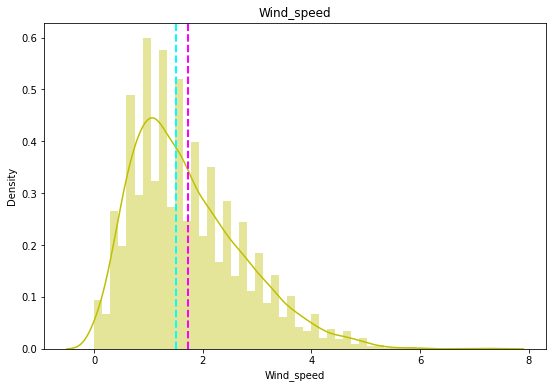

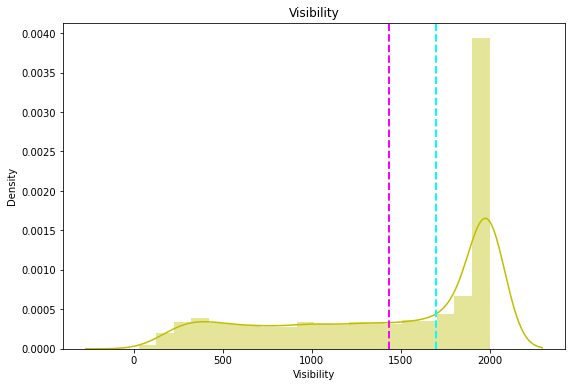

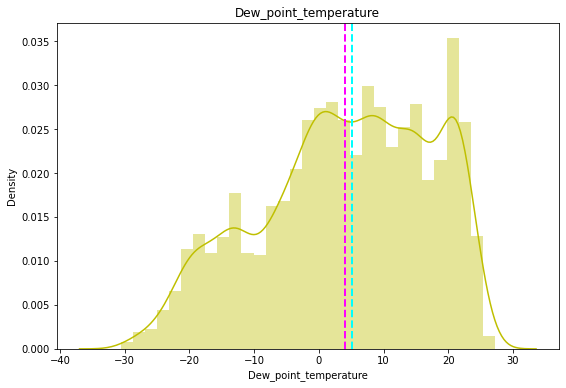

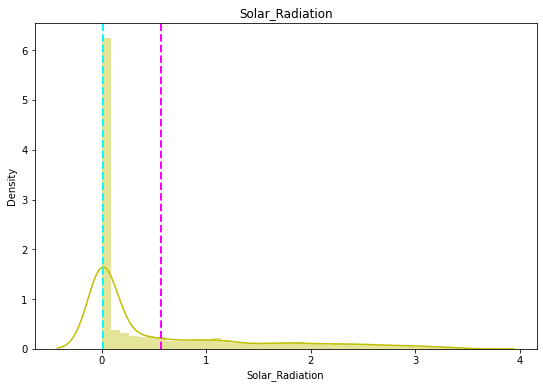

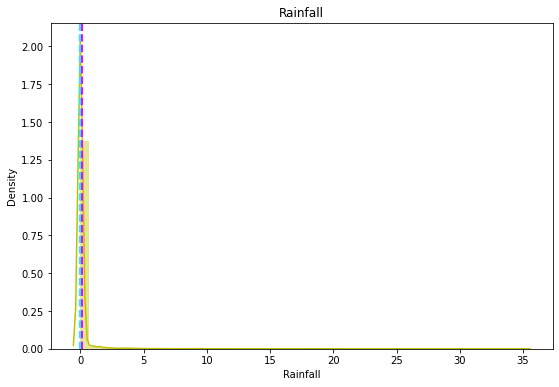

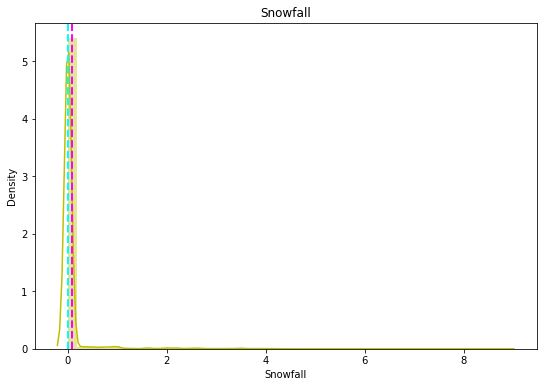

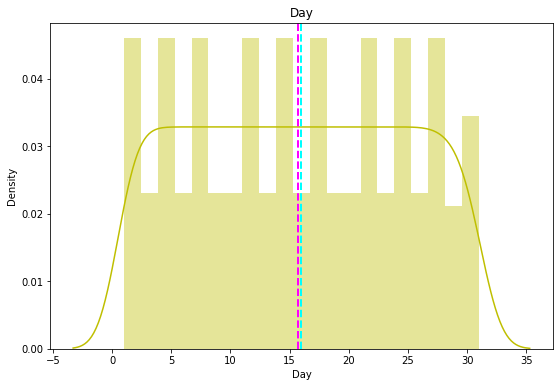

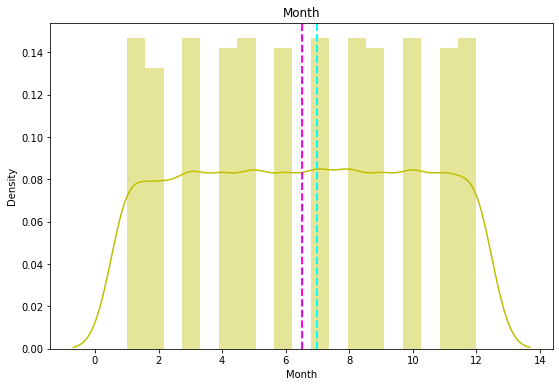

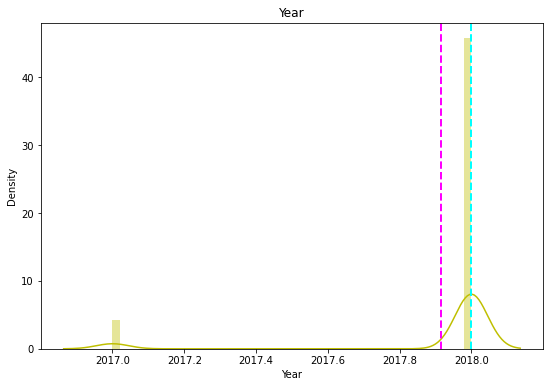

In [ ]:
#Bar plot for each numerical features count
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = plt.gca()
  feature = dataset[col]
  sns.distplot(feature, color = "y")
  ax.axvline(feature.mean(), color = "magenta", linestyle = "dashed", linewidth = 2)
  ax.axvline(feature.median(), color = "cyan", linestyle = "dashed", linewidth = 2)
  ax.set_title(col)
plt.show()

In [ ]:
dataset["Year"].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [ ]:
dataset.groupby(["Year", "Month"]).agg({"Rented_Bike_count": "sum"}).reset_index()

Year  Month  Rented_Bike_count
0   2017      1               9539
1   2017      2               8523
2   2017      3               7222
3   2017      4               8729
4   2017      5               8307
5   2017      6               6669
6   2017      7               8549
7   2017      8               8032
8   2017      9               7233
9   2017     10               3453
10  2017     11               5848
11  2017     12             103226
12  2018      1             277705
13  2018      2             255589
14  2018      3             447815
15  2018      4             547490
16  2018      5             657641
17  2018      6             700059
18  2018      7             682790
19  2018      8             606158
20  2018      9             492093
21  2018     10             623535
22  2018     11             487564
23  2018     12             208545

In [ ]:
dataset["Month_name"] = dataset["Month"].map({1:'Janyuary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [ ]:
#bar plot for month_year_group
month_year_group = dataset.groupby(by = ["Month", "Month_name", "Year"]).agg({"Rented_Bike_count": "sum"}).reset_index()
px.bar(month_year_group, x = "Month_name", y = "Rented_Bike_count", color = "Year", facet_row= "Year", title = "Total Rented Bikes in 2017 and 2018 on monthly basis", width = 1000, height = 500)

##<b> Bivariate Analysis

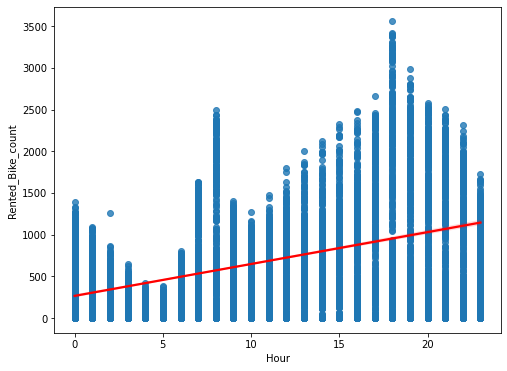

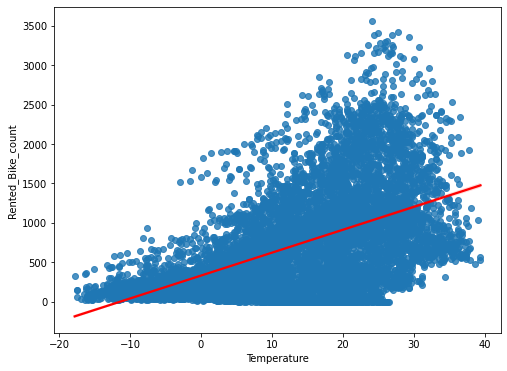

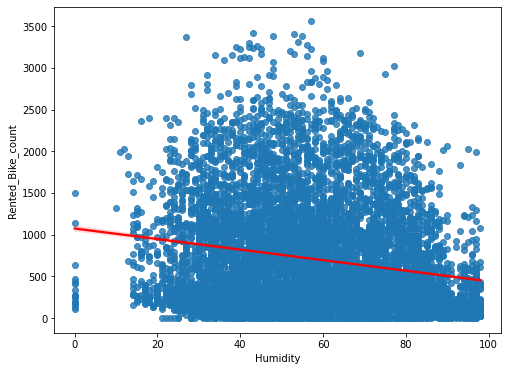

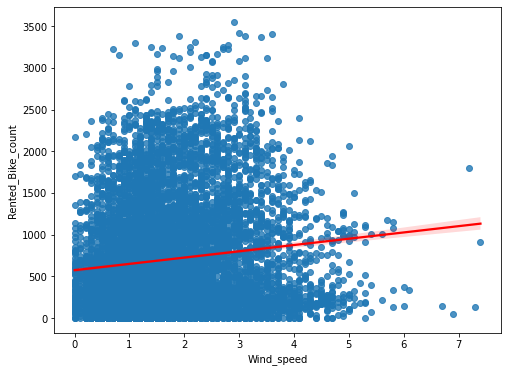

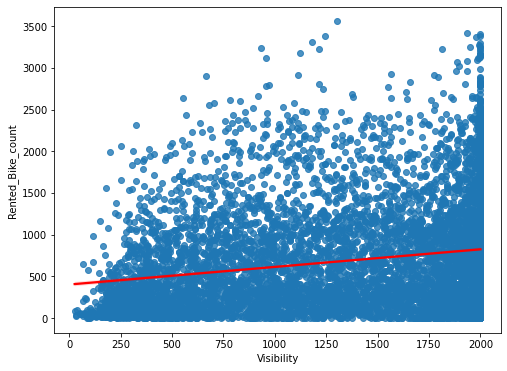

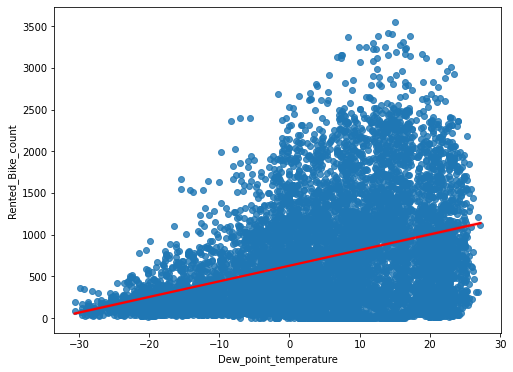

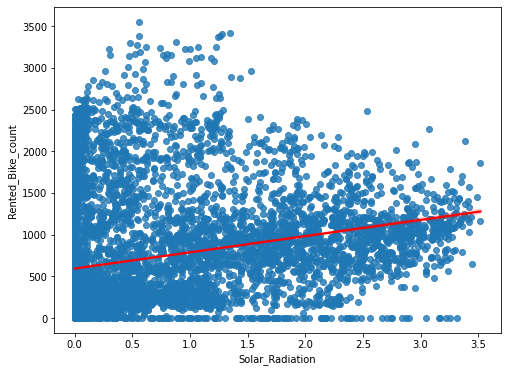

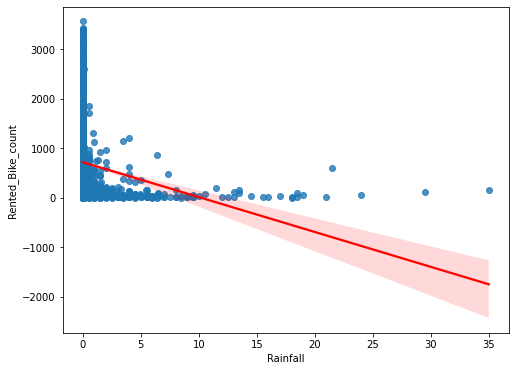

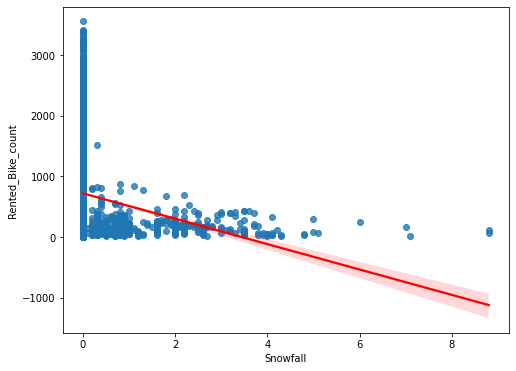

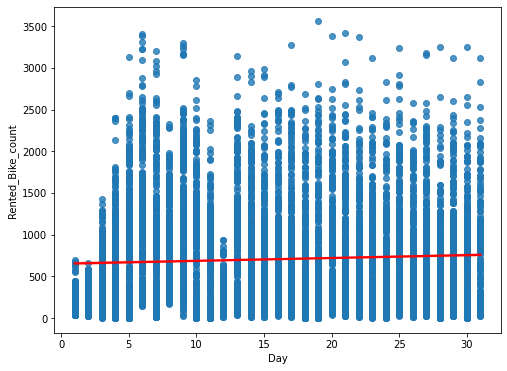

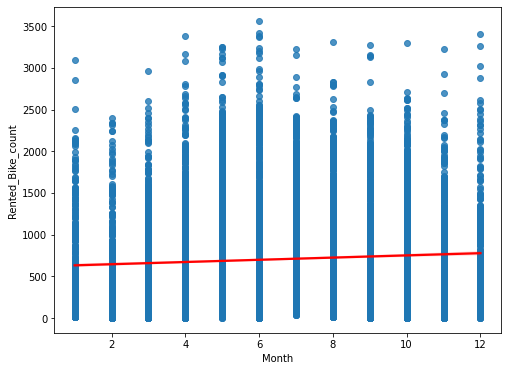

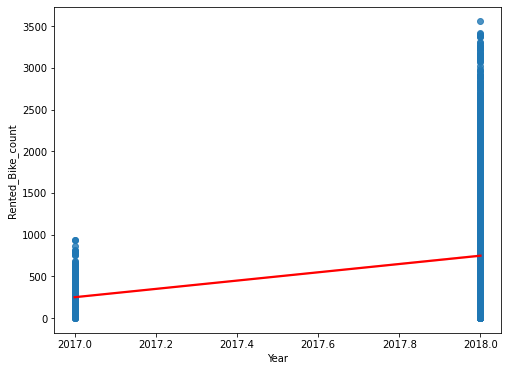

In [ ]:
#plot for numerical feature
plt.rcParams["figure.figsize"] = (8,6)
for col in numeric_features[1:]:
  plt.figure()
  sns.regplot(x = dataset[col], y = dataset["Rented_Bike_count"], line_kws = {"color": "Red"})

##Effects of numericals features on rented bike count: 

* **Hour:** Demand for bikes is mostly in the evening between 3 to 8 pm, also the least demand is at morning 5pm. 
* **Temperature:** People prefer to rent bikes at normal temperature of 20°C. to 30°C. Hence it is positively related to Rented Bike.
* **Humidity:** It is negatively correlated , as people prefer to rent a bike less if there is more moisture in the air.
* **Wind_speed:** Wind Speed doesn't affect much for renting a bike but is slightly positively correlated.
* **Visibility:** It does not affect, similar to wind speed, it is positively correlated.
* **Dew point temperature:** The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.
* **SnowFall and Rainfall**: People don't prefer to rent a bike, when there is rainfall or snowfall.

## Outlier Detection

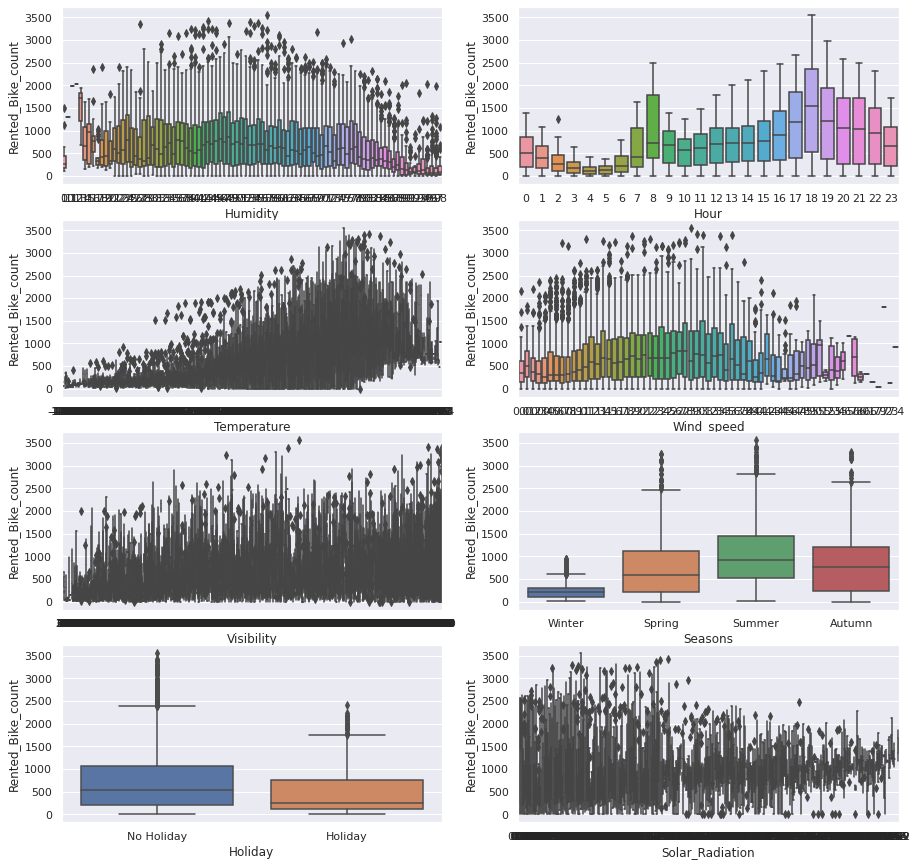

In [ ]:
sns.set(font_scale = 1.0)
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(15,15)

sns.boxplot(data = dataset, x = "Humidity", y = "Rented_Bike_count", orient = "v", ax = axis[0][0])
sns.boxplot(data = dataset, x = "Hour", y = "Rented_Bike_count", orient = "v", ax = axis[0][1])
sns.boxplot(data = dataset, x = "Temperature", y = "Rented_Bike_count", orient = "v", ax = axis[1][0])
sns.boxplot(data = dataset, x = "Wind_speed", y = "Rented_Bike_count", orient = "v", ax = axis[1][1])
sns.boxplot(data = dataset, x = "Visibility", y = "Rented_Bike_count", orient = "v", ax = axis[2][0])
sns.boxplot(data = dataset, x = "Seasons", y = "Rented_Bike_count", orient = "v", ax = axis[2][1])
sns.boxplot(data = dataset, x = "Holiday", y = "Rented_Bike_count", orient = "v", ax = axis[3][0])
sns.boxplot(data = dataset, x = "Solar_Radiation", y = "Rented_Bike_count", orient = "v", ax = axis[3][1])

##<b>Correlation

In [ ]:
#Correlation
np.round(dataset.corr()["Rented_Bike_count"], 3)

Rented_Bike_count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Day                      0.047
Month                    0.071
Year                     0.215
Name: Rented_Bike_count, dtype: float64

###Maximum correlation showing Hour and Temperature with Rented_Bike_count

In [ ]:
#drooping non perfoming columns
dataset.drop(["Month_name", "Date"], axis = 1, inplace = True)

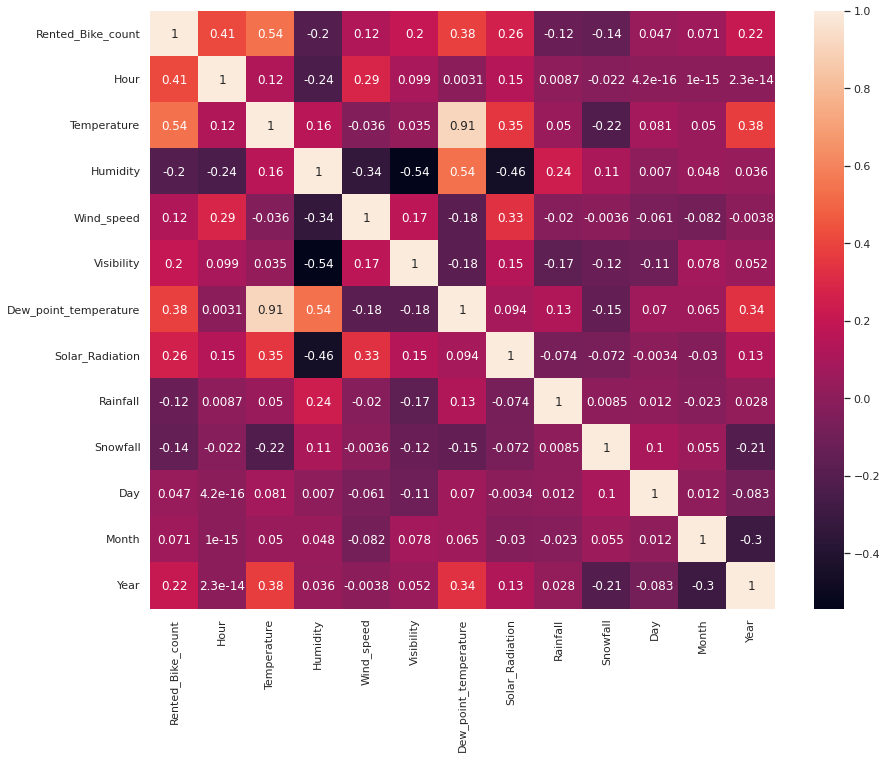

In [ ]:
#plot heatmap to get correlation with each features
plt.figure(figsize = (14,11))
sns.heatmap(dataset.corr(), annot = True)

### Temperature and Dew_point_temperature are highly correlated so, we can add them into one column

In [ ]:
dataset["Temperature_and_dp_temperature"] = dataset["Temperature"] + dataset["Dew_point_temperature"]
dataset.drop(["Temperature", "Dew_point_temperature"], axis = 1, inplace = True)

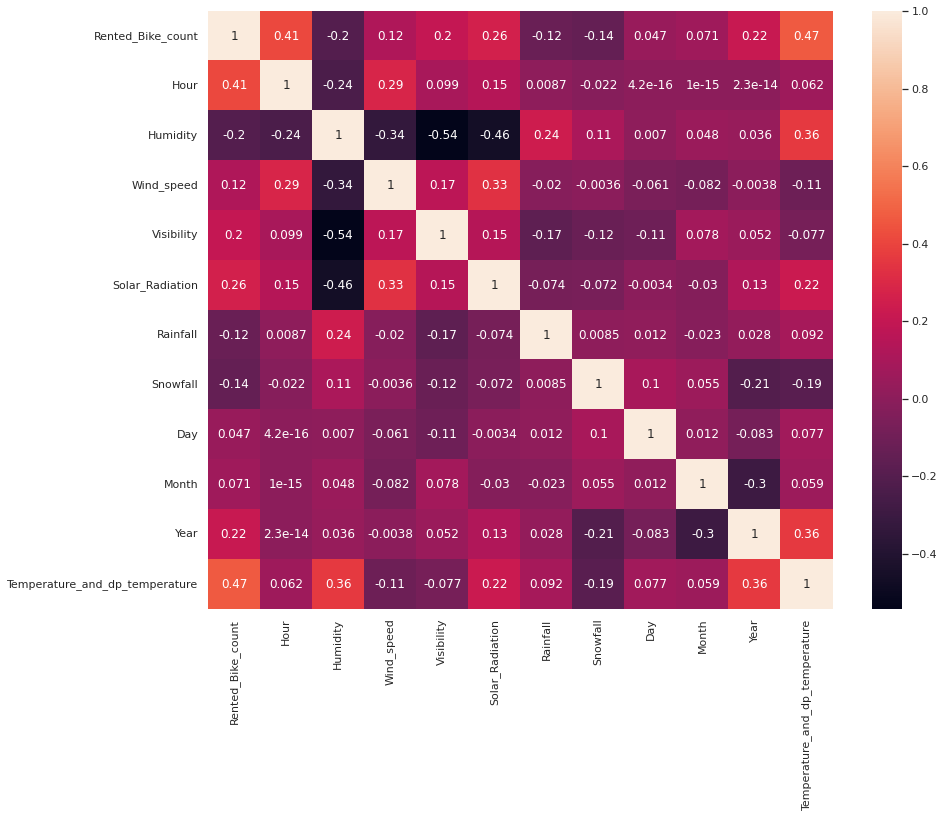

In [ ]:
plt.figure(figsize = (14,11))
sns.heatmap(dataset.corr(), annot = True)

##Data Preparation

In [ ]:
dataset_test = dataset.tail()
dataset_test

Rented_Bike_count  Hour  Humidity  Wind_speed  Visibility  \
8755               1003    19        34         2.6        1894   
8756                764    20        37         2.3        2000   
8757                694    21        39         0.3        1968   
8758                712    22        41         1.0        1859   
8759                584    23        43         1.3        1909   

      Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
8755              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8756              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8757              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8758              0.0       0.0       0.0  Autumn  No Holiday             Yes   
8759              0.0       0.0       0.0  Autumn  No Holiday             Yes   

      Day  Month  Year  Temperature_and_dp_temperature  
8755   30     11  2018                            -6.1  
8756   30     11  2018                            -6.5  
8757   30     11  2018                            -7.3  
8758   30     11  2018                            -7.7  
8759   30     11  2018                            -7.4

In [ ]:
dataset_test_x  = dataset_test.drop(labels = "Rented_Bike_count", axis =1)
dataset_test_x

Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
8755    19        34         2.6        1894              0.0       0.0   
8756    20        37         2.3        2000              0.0       0.0   
8757    21        39         0.3        1968              0.0       0.0   
8758    22        41         1.0        1859              0.0       0.0   
8759    23        43         1.3        1909              0.0       0.0   

      Snowfall Seasons     Holiday Functioning_Day  Day  Month  Year  \
8755       0.0  Autumn  No Holiday             Yes   30     11  2018   
8756       0.0  Autumn  No Holiday             Yes   30     11  2018   
8757       0.0  Autumn  No Holiday             Yes   30     11  2018   
8758       0.0  Autumn  No Holiday             Yes   30     11  2018   
8759       0.0  Autumn  No Holiday             Yes   30     11  2018   

      Temperature_and_dp_temperature  
8755                            -6.1  
8756                            -6.5  
8757                            -7.3  
8758                            -7.7  
8759                            -7.4

In [ ]:
def one_hote_code(data):
  return(pd.get_dummies(data, drop_first = True))

In [ ]:
#Create dummies
dataset_copy = one_hote_code(dataset)

In [ ]:
dataset_copy.tail()

Rented_Bike_count  Hour  Humidity  Wind_speed  Visibility  \
8755               1003    19        34         2.6        1894   
8756                764    20        37         2.3        2000   
8757                694    21        39         0.3        1968   
8758                712    22        41         1.0        1859   
8759                584    23        43         1.3        1909   

      Solar_Radiation  Rainfall  Snowfall  Day  Month  Year  \
8755              0.0       0.0       0.0   30     11  2018   
8756              0.0       0.0       0.0   30     11  2018   
8757              0.0       0.0       0.0   30     11  2018   
8758              0.0       0.0       0.0   30     11  2018   
8759              0.0       0.0       0.0   30     11  2018   

      Temperature_and_dp_temperature  Seasons_Spring  Seasons_Summer  \
8755                            -6.1               0               0   
8756                            -6.5               0               0   
8757                            -7.3               0               0   
8758                            -7.7               0               0   
8759                            -7.4               0               0   

      Seasons_Winter  Holiday_No Holiday  Functioning_Day_Yes  
8755               0                   1                    1  
8756               0                   1                    1  
8757               0                   1                    1  
8758               0                   1                    1  
8759               0                   1                    1

In [ ]:
#data for independent variables
X = dataset_copy.drop(labels = "Rented_Bike_count", axis = 1)
#data for independent variables
y = dataset_copy["Rented_Bike_count"]

##Let's now train our model, first we need to split our data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 24)

In [ ]:
X_test

Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
4401     9        43         1.2        1257             1.91       0.0   
368      8        62         2.6        1112             0.00       0.0   
1465     1        81         1.1        1141             0.00       0.0   
6091    19        44         2.2        2000             0.30       0.0   
8219    11        95         2.4         519             0.12       0.0   
...    ...       ...         ...         ...              ...       ...   
8717     5        34         0.9        1990             0.00       0.0   
1703    23        70         0.7         689             0.00       0.0   
1969     1        31         1.1        1970             0.00       0.0   
2550     6        63         1.0        2000             0.00       0.0   
988      4        57         2.3        1899             0.00       0.0   

      Snowfall  Day  Month  Year  Temperature_and_dp_temperature  \
4401       0.0    6      2  2018                            33.3   
368        0.0   16     12  2017                           -20.6   
1465       3.5   31      1  2018                            -6.0   
6091       0.0    8     11  2018                            53.6   
8219       0.0   11      8  2018                            21.0   
...        ...  ...    ...   ...                             ...   
8717       0.0   29     11  2018                           -10.6   
1703       0.0    2      9  2018                            -0.9   
1969       0.0   21      2  2018                           -19.2   
2550       0.0   17      3  2018                            -4.6   
988        0.0    1     11  2018                           -29.8   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
4401               0               1               0                   1   
368                0               0               1                   1   
1465               0               0               1                   1   
6091               0               1               0                   1   
8219               0               0               0                   1   
...              ...             ...             ...                 ...   
8717               0               0               0                   1   
1703               0               0               1                   1   
1969               0               0               1                   1   
2550               1               0               0                   1   
988                0               0               1                   1   

      Functioning_Day_Yes  
4401                    1  
368                     1  
1465                    1  
6091                    1  
8219                    1  
...                   ...  
8717                    1  
1703                    1  
1969                    1  
2550                    1  
988                     1  

[1752 rows x 16 columns]

In [ ]:
X_train

Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
6054     6        83         0.6        1483             0.00       0.0   
6371    11        57         1.7        1992             0.88       0.1   
280     16        29         2.8        1983             0.58       0.0   
1475    11        46         2.5        1906             0.56       0.0   
4462    22        64         1.8        1211             0.00       0.0   
...    ...       ...         ...         ...              ...       ...   
6500    20        97         3.3         183             0.00      15.5   
5249    17        45         1.4        2000             1.89       0.0   
3473    17        52         1.9        2000             0.64       0.0   
8535    15        53         2.0        2000             0.22       0.0   
899     11        35         1.4        1558             0.75       0.0   

      Snowfall  Day  Month  Year  Temperature_and_dp_temperature  \
6054       0.0    8     10  2018                            48.2   
6371       0.0   23      8  2018                            50.3   
280        0.0   12     12  2017                           -27.2   
1475       3.0   31      1  2018                           -13.1   
4462       0.0    6      4  2018                            36.8   
...        ...  ...    ...   ...                             ...   
6500       0.0   28      8  2018                            46.0   
5249       0.0    7      7  2018                            44.6   
3473       0.0   24      4  2018                            20.4   
8535       0.0   21     11  2018                             2.6   
899        0.0    1      7  2018                           -12.7   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
6054               0               1               0                   1   
6371               0               1               0                   1   
280                0               0               1                   1   
1475               0               0               1                   1   
4462               0               1               0                   1   
...              ...             ...             ...                 ...   
6500               0               1               0                   1   
5249               0               1               0                   1   
3473               1               0               0                   1   
8535               0               0               0                   1   
899                0               0               1                   1   

      Functioning_Day_Yes  
6054                    1  
6371                    1  
280                     1  
1475                    1  
4462                    1  
...                   ...  
6500                    1  
5249                    1  
3473                    1  
8535                    1  
899                     1  

[7008 rows x 16 columns]

In [ ]:
y_train

6054     645
6371     711
280      248
1475     144
4462    2000
        ... 
6500      10
5249    2020
3473    1462
8535     550
899      214
Name: Rented_Bike_count, Length: 7008, dtype: int64

In [ ]:
y_test

4401    1005
368      190
1465      96
6091    1482
8219      25
        ... 
8717     126
1703     193
1969     162
2550     109
988       33
Name: Rented_Bike_count, Length: 1752, dtype: int64

In [ ]:
test_data = X_test.copy()
test_data["Rented_Bike_count"]  = y_test

In [ ]:
test_data

Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
4401     9        43         1.2        1257             1.91       0.0   
368      8        62         2.6        1112             0.00       0.0   
1465     1        81         1.1        1141             0.00       0.0   
6091    19        44         2.2        2000             0.30       0.0   
8219    11        95         2.4         519             0.12       0.0   
...    ...       ...         ...         ...              ...       ...   
8717     5        34         0.9        1990             0.00       0.0   
1703    23        70         0.7         689             0.00       0.0   
1969     1        31         1.1        1970             0.00       0.0   
2550     6        63         1.0        2000             0.00       0.0   
988      4        57         2.3        1899             0.00       0.0   

      Snowfall  Day  Month  Year  Temperature_and_dp_temperature  \
4401       0.0    6      2  2018                            33.3   
368        0.0   16     12  2017                           -20.6   
1465       3.5   31      1  2018                            -6.0   
6091       0.0    8     11  2018                            53.6   
8219       0.0   11      8  2018                            21.0   
...        ...  ...    ...   ...                             ...   
8717       0.0   29     11  2018                           -10.6   
1703       0.0    2      9  2018                            -0.9   
1969       0.0   21      2  2018                           -19.2   
2550       0.0   17      3  2018                            -4.6   
988        0.0    1     11  2018                           -29.8   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
4401               0               1               0                   1   
368                0               0               1                   1   
1465               0               0               1                   1   
6091               0               1               0                   1   
8219               0               0               0                   1   
...              ...             ...             ...                 ...   
8717               0               0               0                   1   
1703               0               0               1                   1   
1969               0               0               1                   1   
2550               1               0               0                   1   
988                0               0               1                   1   

      Functioning_Day_Yes  Rented_Bike_count  
4401                    1               1005  
368                     1                190  
1465                    1                 96  
6091                    1               1482  
8219                    1                 25  
...                   ...                ...  
8717                    1                126  
1703                    1                193  
1969                    1                162  
2550                    1                109  
988                     1                 33  

[1752 rows x 17 columns]

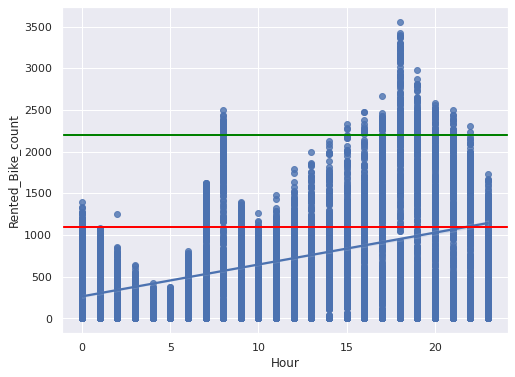

In [ ]:
plt.figure()
sns.regplot(x= dataset["Hour"], y = dataset["Rented_Bike_count"])
plt.axhline(y = 1100, color = "red",linewidth = 2)
plt.axhline(y = 2200, color = "Green",linewidth = 2)

In [ ]:
#peak hour data
peak_hour_test_data = test_data[test_data["Hour"].isin([8,15,16,17,18,19,20,21,22])]
peak_hour_data_X = peak_hour_test_data.drop(labels = "Rented_Bike_count", axis = 1)
peak_hour_data_y =peak_hour_test_data["Rented_Bike_count"]

In [ ]:
#Normal hour data
normal_hour_test_data = test_data[test_data["Hour"].isin([7,9,10,11,12,13,14,23,0])]
normal_hour_data_X = normal_hour_test_data.drop(labels = "Rented_Bike_count", axis = 1)
normal_hour_data_y =normal_hour_test_data["Rented_Bike_count"]

In [ ]:
##Low demand data
low_dm_hour_test_data = test_data[test_data["Hour"].isin([1,2,3,4,5,6])]
low_dm_hour_data_X = low_dm_hour_test_data.drop(labels = "Rented_Bike_count", axis = 1)
low_dm_hour_data_y =low_dm_hour_test_data["Rented_Bike_count"]

# Implementing Linear Models

##Implementing Linear Regression

For Linear Regression to be implemented we have to take certain assumptions.
1. **Linear relationship** - There should be linear relationship between feature variable and dependent variable.
2. **Little or no-multicollinearity** - There should not be multicollinearity among variables.
3. **Little or no auto-correlation** - Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
4. **Homoscedasticity** -  Variance should be same, i.e error term should be same across all values of the independent variable.

Regression Evaluation metrics
---

1. **Mean Squared Error (MSE)** is the mean of the squared errors.
2. **Root Mean Squared Error (RMSE)**  is the square root of the mean of the squared errors.
3. **R-Squared** 
4. **Adujusted R-Squared**

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(7008, 16) (7008,)
(1752, 16) (7008,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 2.80006889e+01, -1.16531131e+01,  2.17172641e+01,  3.29163869e-03,
       -7.80791130e+01, -5.57324590e+01,  3.61168514e+01, -1.32971468e+00,
       -6.72650976e-01, -9.72889305e+01,  1.38058492e+01, -1.32686667e+02,
       -1.47265755e+02, -4.06171264e+02,  1.19783278e+02,  9.40371908e+02])

In [ ]:
len(reg.coef_)

16

In [ ]:
reg.intercept_

196331.8037127613

In [ ]:
#Overall prediction
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
y_pred_peak_hour = reg.predict(peak_hour_data_X)

In [ ]:
y_pred_train

array([ 782.41667413, 1187.07449452,  486.58782029, ..., 1045.17130015,
        898.70490124,  352.47513049])

In [ ]:
y_pred_test

array([ 998.0320927 ,    1.90473676, -229.85078605, ...,   59.51194578,
        304.23899602, -259.44148478])

In [ ]:
#metrics for linear regression analysis for train dataset
MSE = mean_squared_error((y_train),(y_pred_train))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE : 190710.62548259995
RMSE : 436.70427692272483
R2: 0.5488899632663061
Adjusted R2 : 0.5478575271931064


In [ ]:
#metrics for linear regression analysis for test dataset
MSE = mean_squared_error((y_test),(y_pred_test))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_test)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 169871.70934024057
RMSE : 412.15495792267325
R2: 0.5624656403341544
Adjusted R2 : 0.5584307413401177


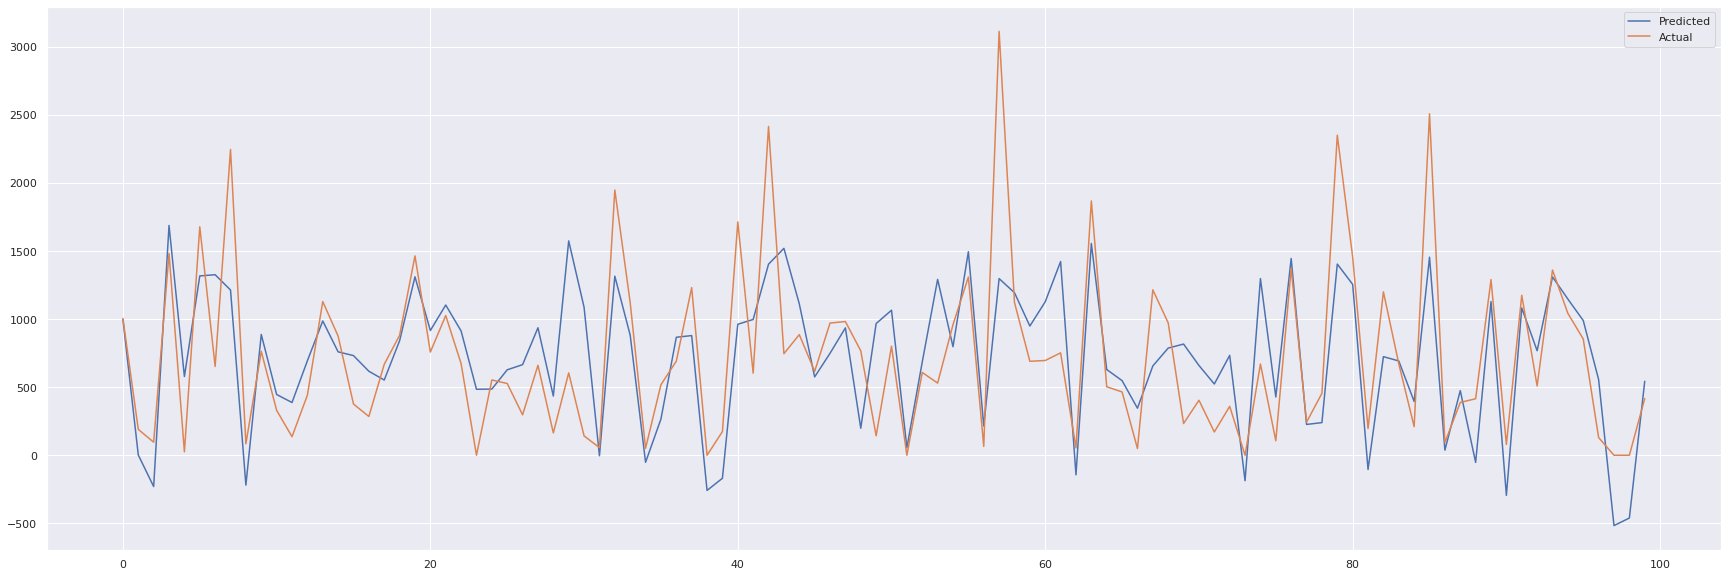

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(np.array(y_pred_test[:100]))
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted", "Actual"])
plt.show()

Text(0, 0.5, 'residuals')

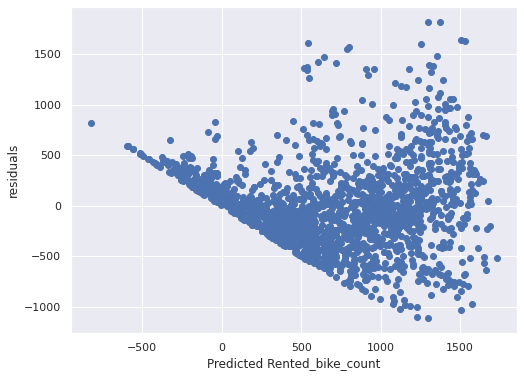

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

## Implementing Lasso Regression

In [ ]:
lasso = Lasso(alpha = 0.0001, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)

0.5488899632605777

In [ ]:
lasso.coef_

array([ 2.80007017e+01, -1.16530927e+01,  2.17169413e+01,  3.29207389e-03,
       -7.80787192e+01, -5.57323852e+01,  3.61161843e+01, -1.32967545e+00,
       -6.72381603e-01, -9.72844136e+01,  1.38058520e+01, -1.32683360e+02,
       -1.47263304e+02, -4.06166124e+02,  1.19780877e+02,  9.40367277e+02])

In [ ]:
lasso.intercept_

196322.6889443357

In [ ]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

In [ ]:
#Evaluation metrics for lasso regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_l))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_l)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 190710.6254850217
RMSE : 436.7042769254976
R2: 0.5488899632605777
Adjusted R2 : 0.5447298707027501


In [ ]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_test_l))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_test_l)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 169871.72597325977
RMSE : 412.1549781007865
R2: 0.5624655974928983
Adjusted R2 : 0.5584306981037839


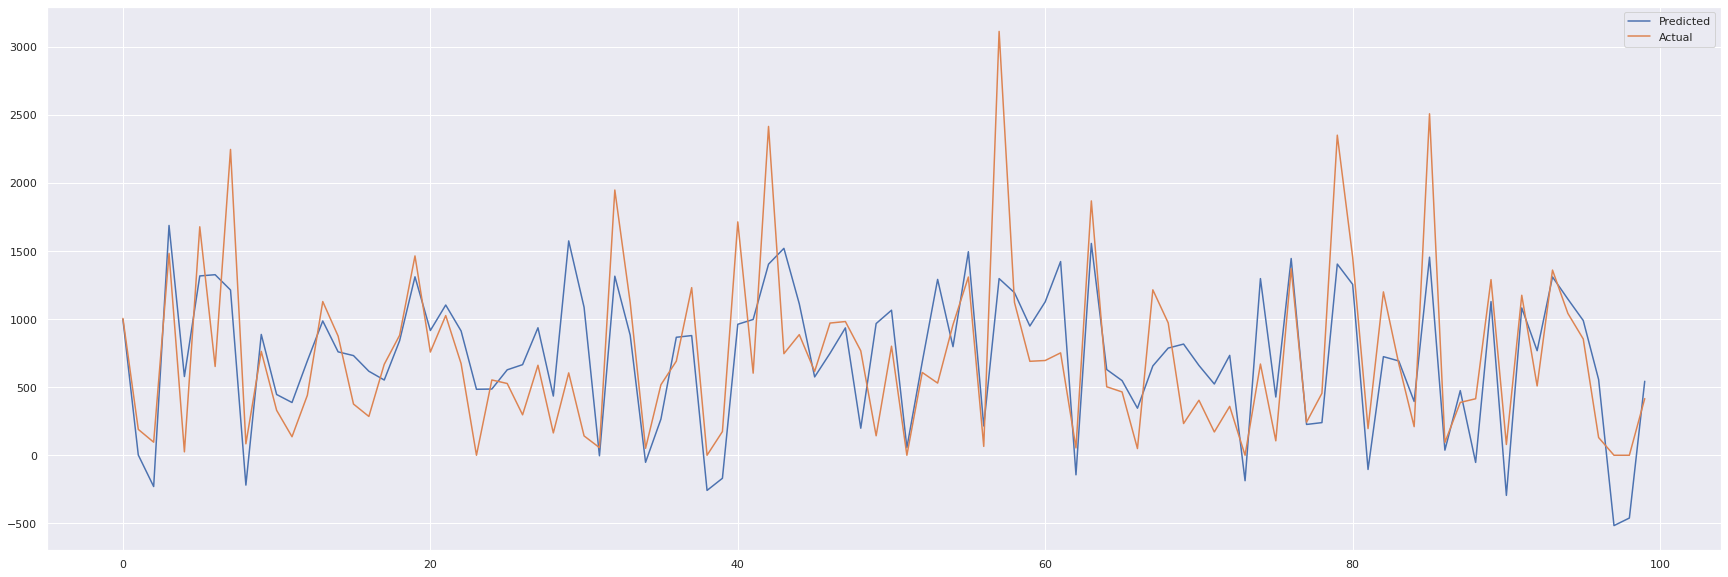

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_l[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

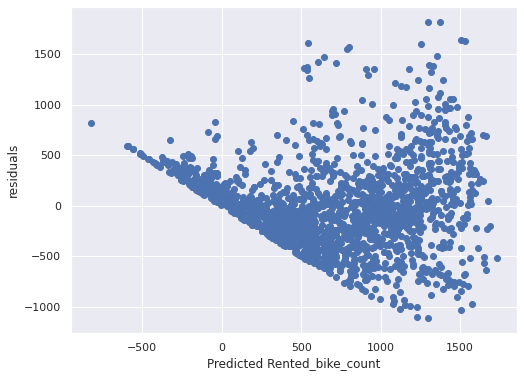

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_l),(y_test)-(y_pred_test_l))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##Running Grid Search Cross-Validation for Lasso

In [ ]:
#Cross Validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fir alpha value is found out to be: ", lasso_regressor.best_params_)
print("\nusing", lasso_regressor.best_params_, "the best negative mean squared error is: ", lasso_regressor.best_score_)

The best fir alpha value is found out to be:  {'alpha': 0.01}

using {'alpha': 0.01} the best negative mean squared error is:  -191791.75865652217


In [ ]:
y_pred_train_lasso = lasso_regressor.predict(X_train)
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for lasso regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_lasso))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 190710.64970026072
RMSE : 436.7043046504817
R2: 0.5488899059814547
Adjusted R2 : 0.5447298128954048


In [ ]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 169873.39789560612
RMSE : 412.15700636481495
R2: 0.5624612911638689
Adjusted R2 : 0.5584263520622101


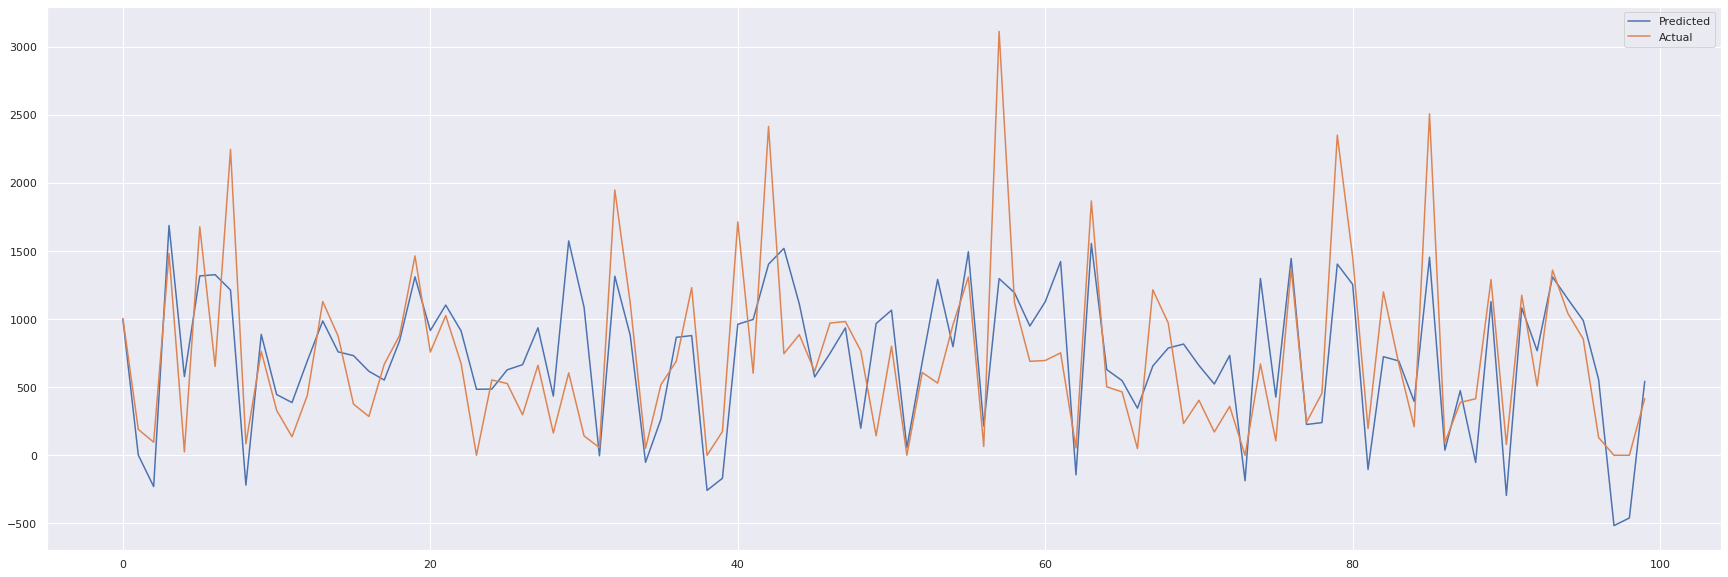

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_lasso[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

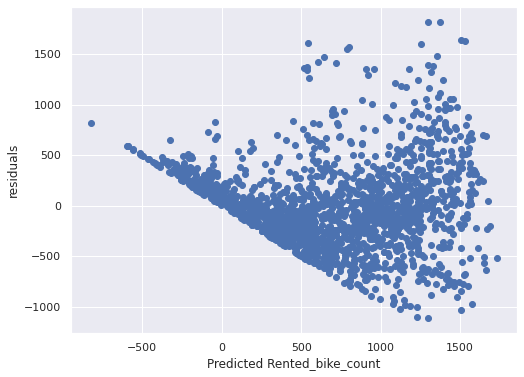

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##Implementing Ridge Regresion

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train,y_train)

0.548889942784337

In [ ]:
y_pred_train_r =ridge.predict(X_train)
y_pred_r =ridge.predict(X_test)

In [ ]:
#Evaluation metrics for ridge regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_r))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 190710.63414152752
RMSE : 436.7042868366734
R2: 0.5488899059814547
Adjusted R2 : 0.5447298128954048


In [ ]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_r))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_r)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 169871.77465071727
RMSE : 412.1550371531534
R2: 0.5624654721155751
Adjusted R2 : 0.5584305715702432


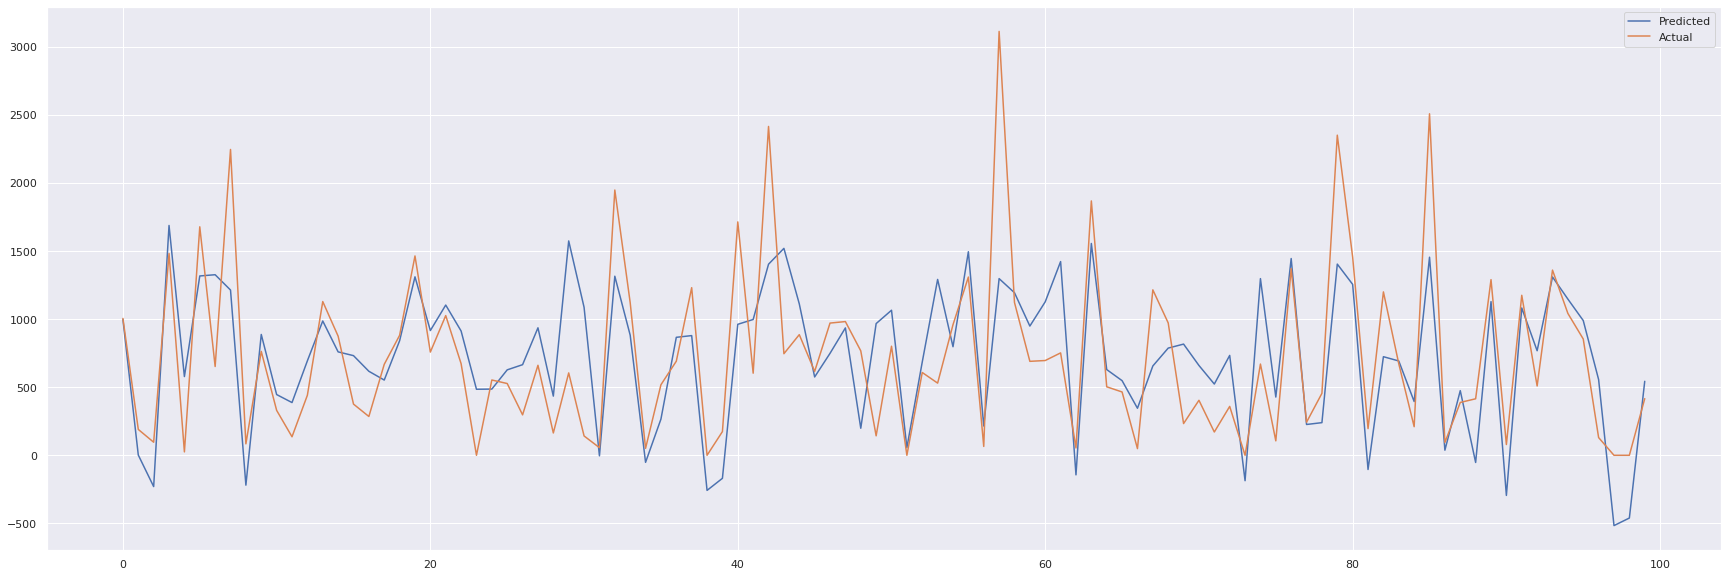

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_r[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

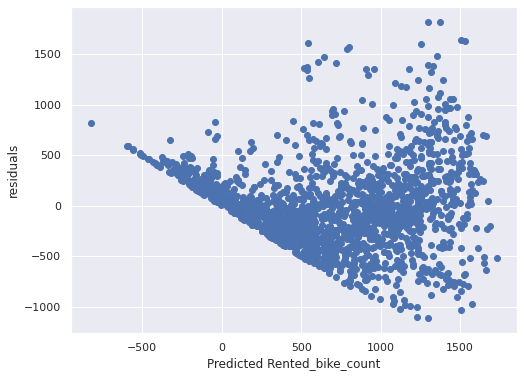

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_r),(y_test)-(y_pred_r))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##Running Grid Search Cross Validation for Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -191771.2782055722


In [ ]:
y_pred_train_ridge = ridge_regressor.predict(X_train)
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for ridge regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_ridge))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_ridge)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 190710.62556927724
RMSE : 436.7042770219651
R2: 0.5488899630612782
Adjusted R2 : 0.5447298705016128


In [ ]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 169871.71502247467
RMSE : 412.1549648159957
R2: 0.5624656256985645
Adjusted R2 : 0.5584307265695599


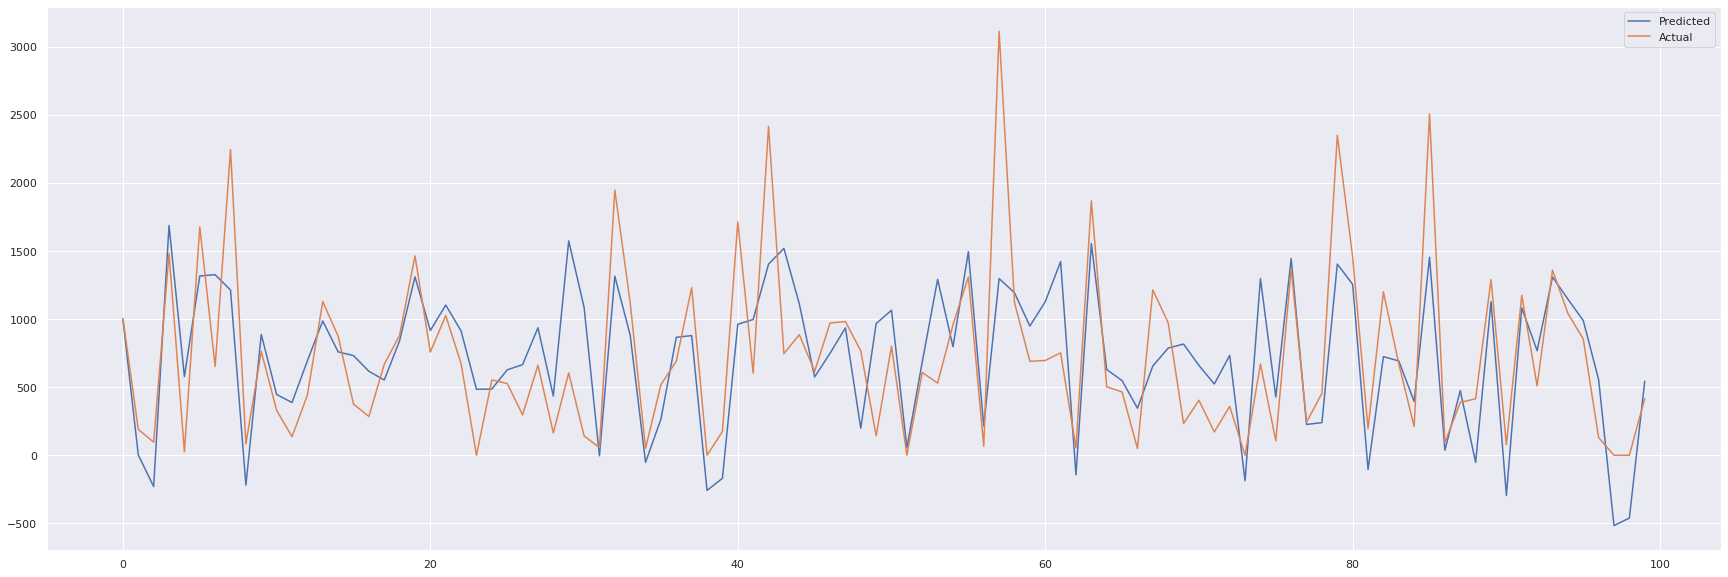

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_ridge[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

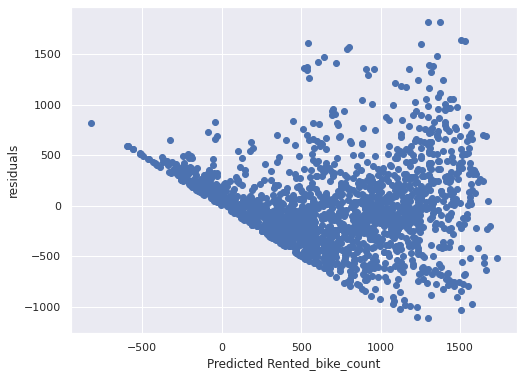

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_ridge),(y_test - y_pred_ridge))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##Implementing Elastic Net Regressor

In [ ]:
from sklearn.linear_model import ElasticNet
#a*L1 +b*L2
#alpha = a+b and l1_ratio = a/(a+b)
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train,y_train)

0.5192989308565615

In [ ]:
y_pred_train_en = elasticnet.predict(X_train)
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Evaluation metrics for ElasticNet regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_en))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_en)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203220.4874674924
RMSE : 450.7998308201683
R2: 0.5192989308565615
Adjusted R2 : 0.5148659526973137


In [ ]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_en))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_en)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 183719.51037262668
RMSE : 428.6251396880807
R2: 0.5267982017652659
Adjusted R2 : 0.5224343811475394


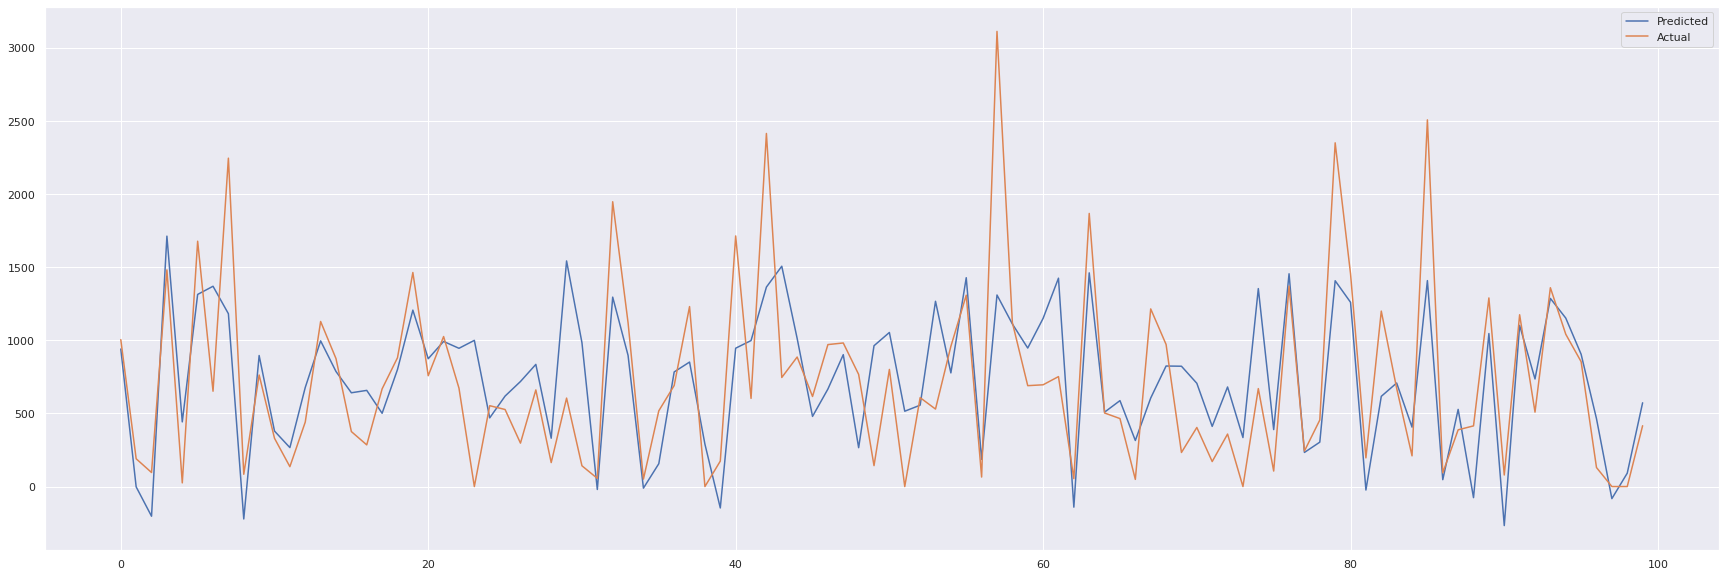

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_en[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

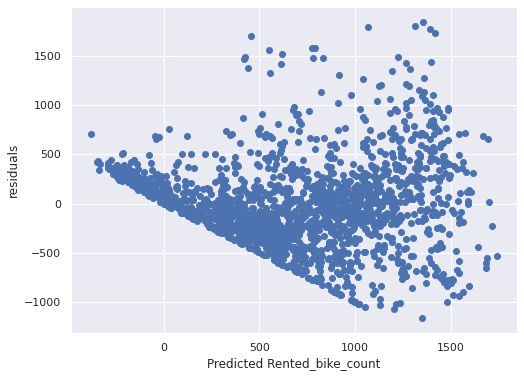

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_en),(y_test - y_pred_en))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##Running Grid Search Cross Validation for Elastic Regression

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=10)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found to be :",elastic_regressor.best_params_)
print("\nUsing",elastic_regressor.best_params_,"the negative mean squared error is :",elastic_regressor.best_score_)

The best fit alpha value is found to be : {'alpha': 0.0001, 'l1_ratio': 0.6}

Using {'alpha': 0.0001, 'l1_ratio': 0.6} the negative mean squared error is : -191856.19122829865


In [ ]:
y_pred_train_elastic =elastic_regressor.predict(X_train)
y_pred_elastic =elastic_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for ElasticNet regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_elastic))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_elastic)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 190710.6937711239
RMSE : 436.70435510895
R2: 0.5488898017355133
Adjusted R2 : 0.5447297076881175


In [ ]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 169871.9503256486
RMSE : 412.1552502706336
R2: 0.5624650196340002
Adjusted R2 : 0.5584301149159276


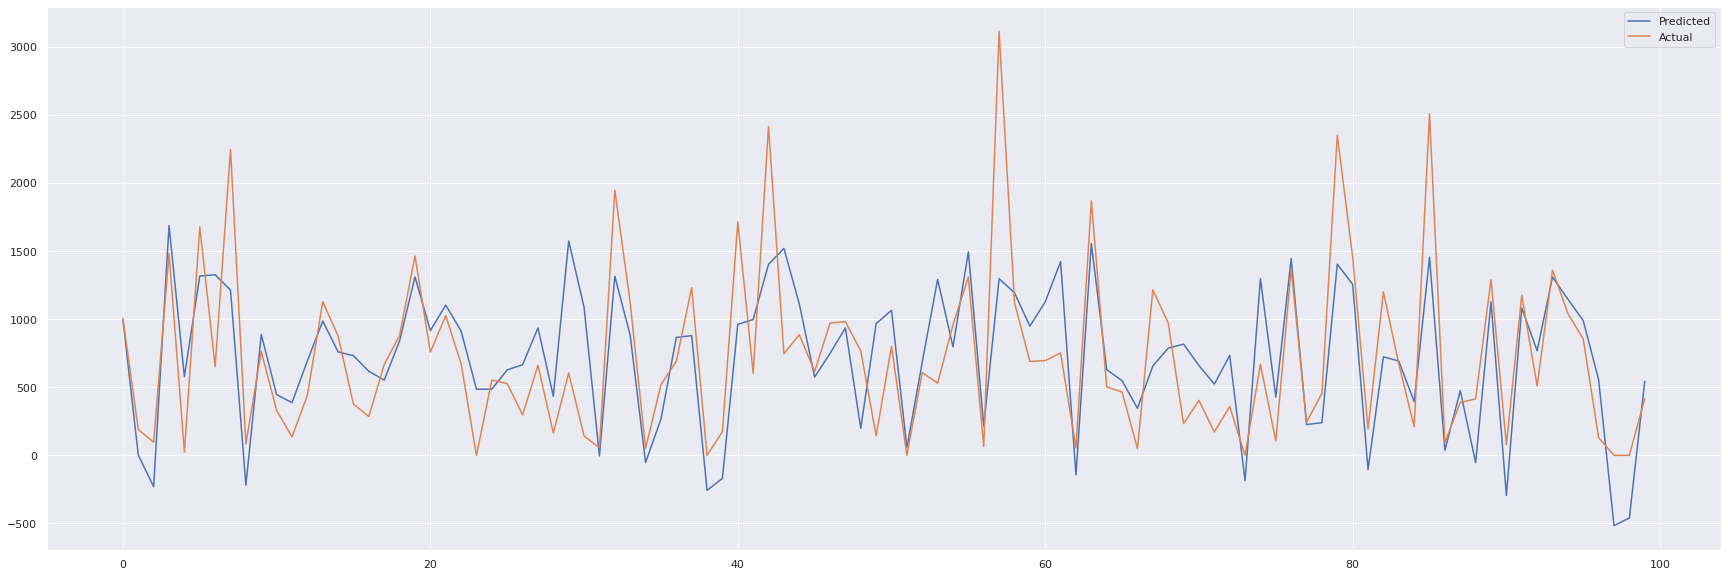

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_elastic[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

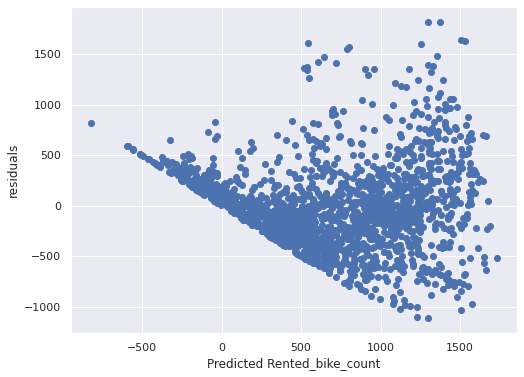

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_elastic),(y_test - y_pred_elastic))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

##As we can see that after applying hyperparameter tuning we achived R2 56%, so we need to implement other algorithems to achive maximum score

# Implementing Tree Based Models

Implementing of decision tree by using decision tree regressor

In [ ]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#y pred for train/test data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for Decision Tree on train data
MSE = mean_squared_error((y_train),(y_pred_train_dt))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_dt)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 76328.2706429576
RMSE : 276.27571489900737
R2: 0.8194518586133761
Adjusted R2 : 0.8177868613441046


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91626.47632392391
RMSE : 302.6986559664973
R2 : 0.7639999514779179
Adjusted R2 : 0.7618235821543713


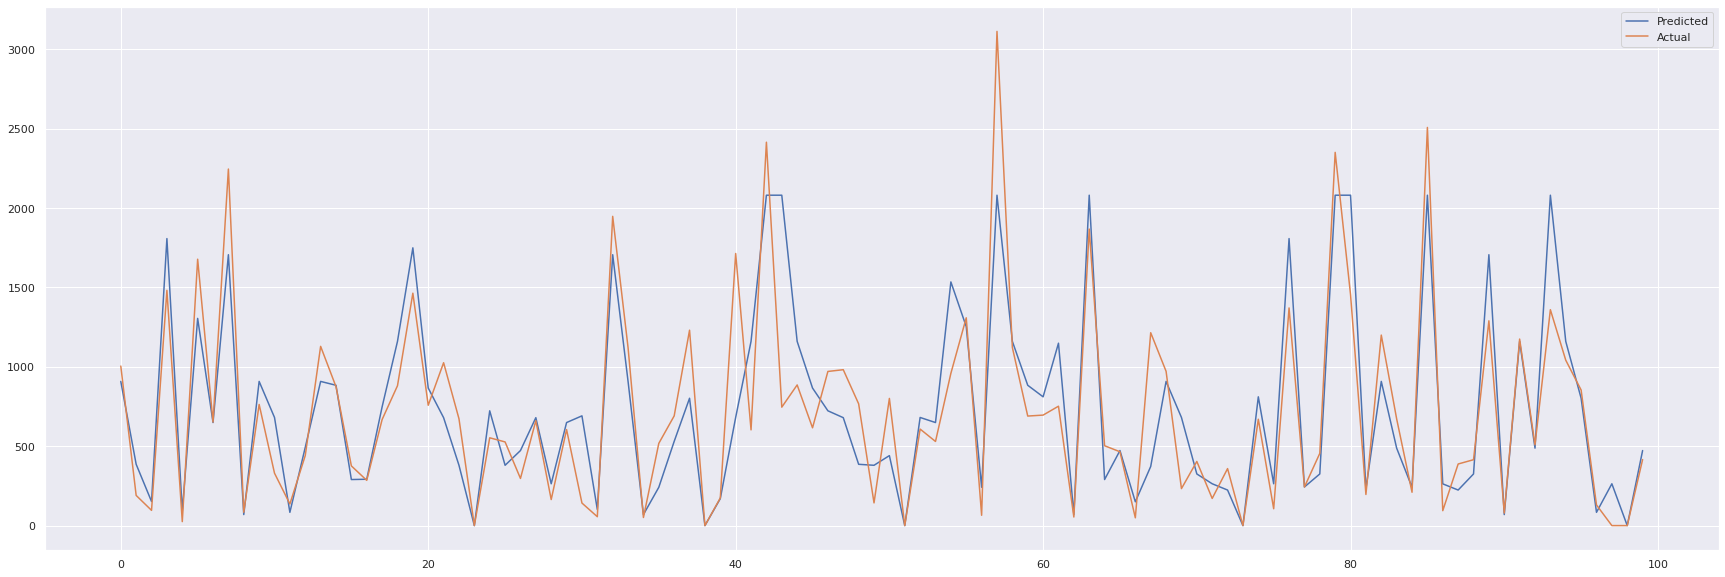

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_dt[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

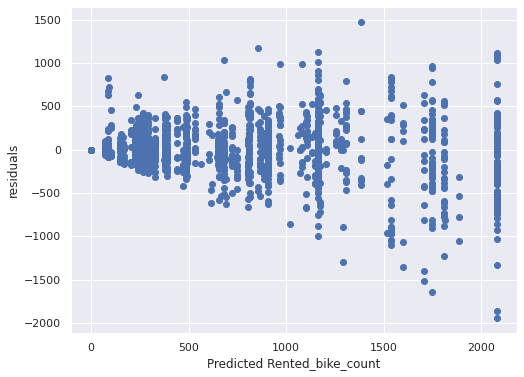

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test - y_pred_test_dt))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

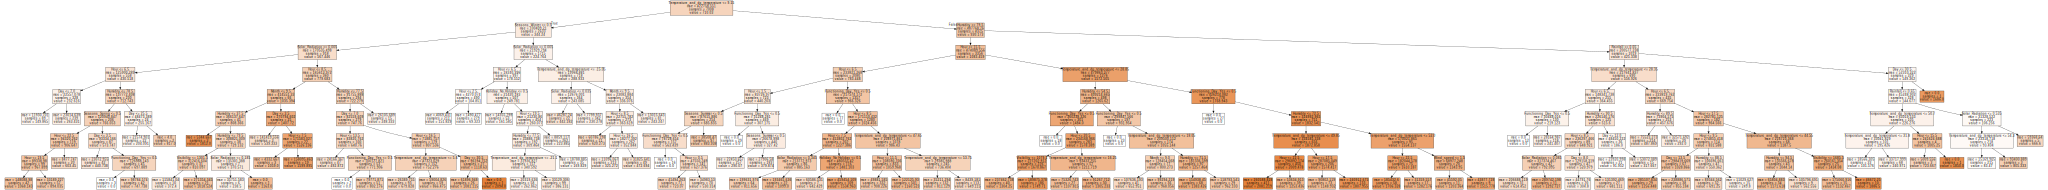

In [ ]:
# decision tree visualization
graph = Source(tree.export_graphviz(decision_regressor, out_file=None, feature_names=X_train.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

##Implementing Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#Evaluation metrics for Random Forest on train data
MSE = mean_squared_error((y_train),(y_pred_train_rf))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_rf)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 7014.866722873859
RMSE : 83.75480119296958
R2: 0.983406919373109
Adjusted R2 : 0.9832538996094028


In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8651297992599828
MSE : 52363.04539891553
RMSE : 228.8297301464902
R2 : 0.8651297992599828
Adjusted R2 : 0.863886039483706


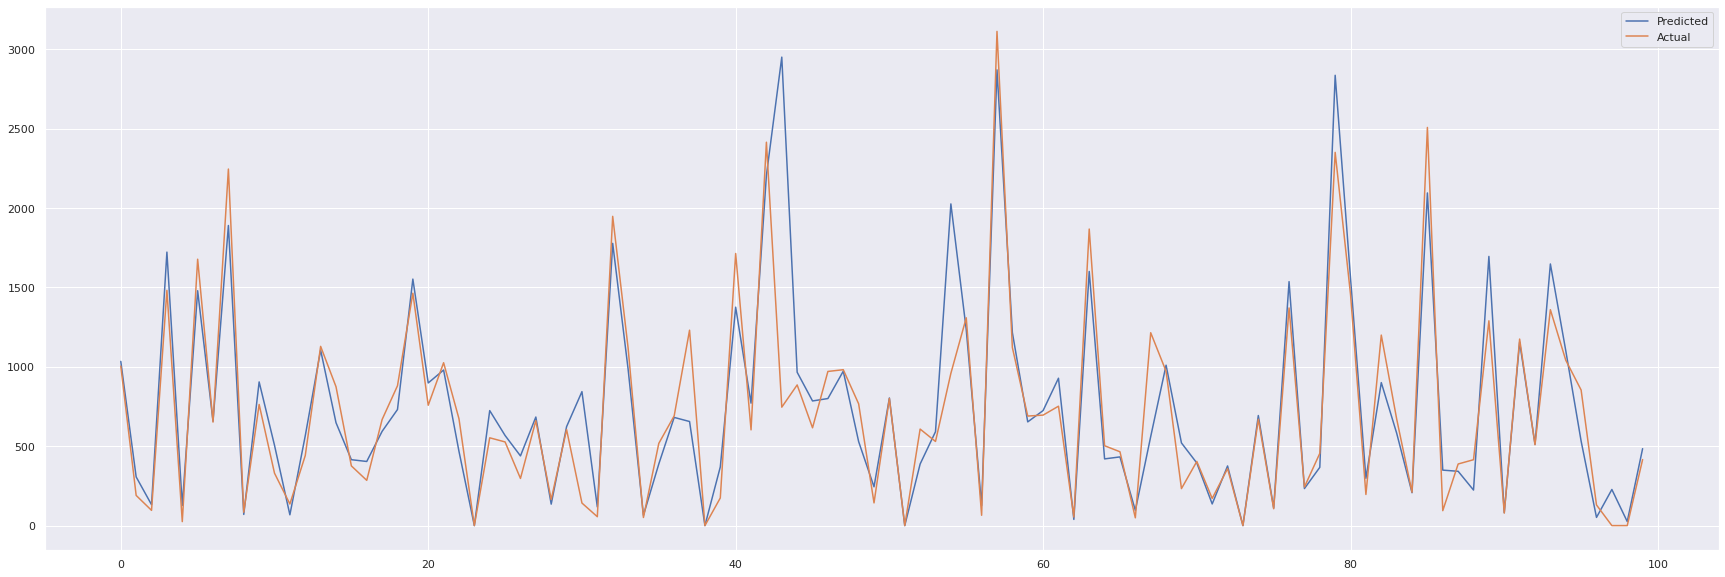

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_rf[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

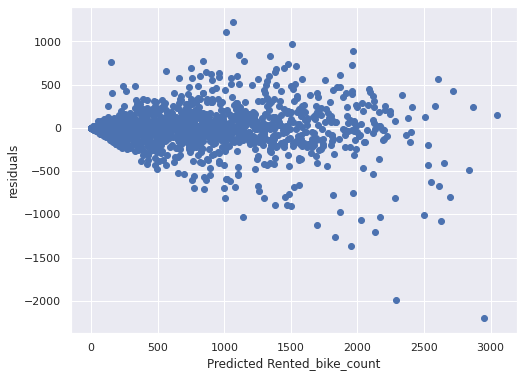

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test - y_pred_test_rf))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
# random forest important feature selection
rf_model.feature_importances_

array([0.29583353, 0.11948327, 0.01539566, 0.01786759, 0.10577043,
       0.01623357, 0.00079967, 0.02035414, 0.01501648, 0.00036253,
       0.26261099, 0.00459516, 0.002443  , 0.03163126, 0.00330043,
       0.08830231])

In [ ]:
importance_rf=rf_model.feature_importances_

In [ ]:
importance_rf_dict={'Feature':list(X_train.columns),'Feature importance':importance_rf}
importance_rf_df=pd.DataFrame(importance_rf_dict)

In [ ]:
importance_rf_df['Feature importance']=round(importance_rf_df['Feature importance'],3)

In [ ]:
importance_rf_df.sort_values(by =['Feature importance'],ascending = False)

Feature  Feature importance
0                             Hour               0.296
10  Temperature_and_dp_temperature               0.263
1                         Humidity               0.119
4                  Solar_Radiation               0.106
15             Functioning_Day_Yes               0.088
13                  Seasons_Winter               0.032
7                              Day               0.020
3                       Visibility               0.018
5                         Rainfall               0.016
2                       Wind_speed               0.015
8                            Month               0.015
11                  Seasons_Spring               0.005
14              Holiday_No Holiday               0.003
12                  Seasons_Summer               0.002
6                         Snowfall               0.001
9                             Year               0.000

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importance_rf = rf_model.feature_importances_
indices = np.argsort(importance_rf)

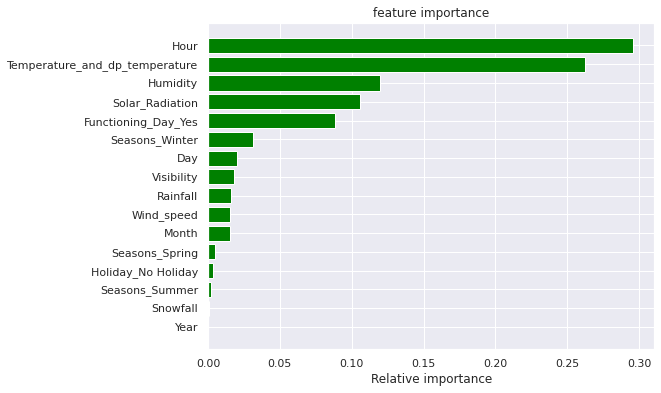

In [ ]:
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show() 

##Running Grid Search Cross Validation for Random Forest Regressor

In [ ]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,7,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 7, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8301209914607082
MSE : 71226.99647749467
RMSE : 266.88386327669696
R2 : 0.8315184960665714
Adjusted R2 : 0.8299647761455715


In [ ]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8315184960665714
MSE : 83113.08306282664
RMSE : 288.2933975359593
R2 : 0.7859276879064541
Adjusted R2 : 0.7839535340197125


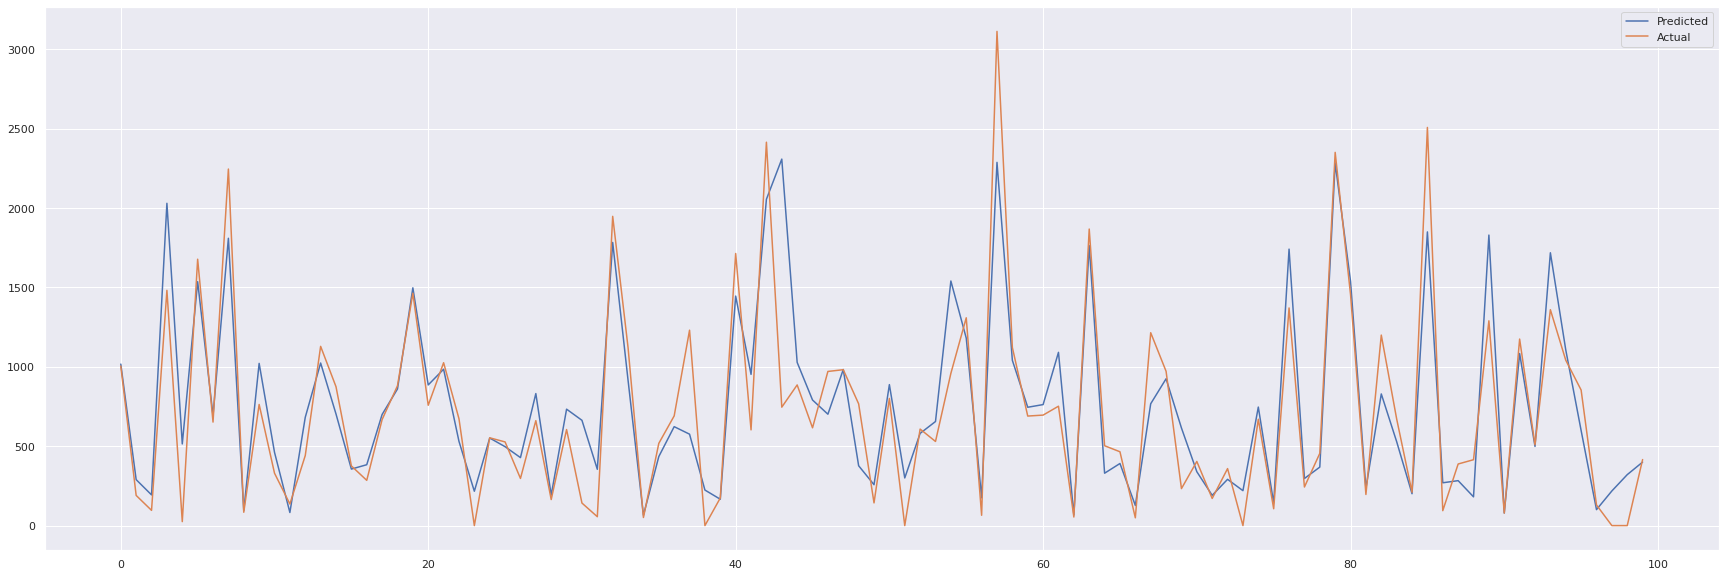

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_r_g[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

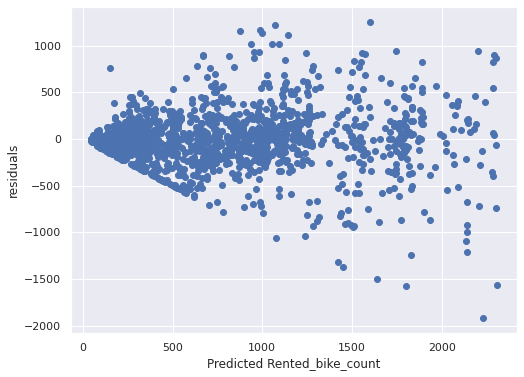

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_r_g),(y_test - y_pred_test_r_g))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
# for the Feature Importance
rf_optimal_model.feature_importances_

array([3.42241861e-01, 1.17131419e-01, 5.81424002e-04, 2.86302426e-03,
       1.06153328e-01, 1.07205103e-02, 1.34546118e-04, 4.89065950e-03,
       2.32997176e-03, 2.23972916e-04, 2.88218552e-01, 1.78284526e-03,
       2.11344289e-03, 3.50970061e-02, 2.05486976e-04, 8.53119495e-02])

In [ ]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [ ]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [ ]:
#reading table of important features
imortance_rf_gddf.head()

Feature  Feature importance
0             Hour                0.34
1         Humidity                0.12
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.11

In [ ]:
#featuer in decending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

Feature  Feature importance
0                             Hour                0.34
10  Temperature_and_dp_temperature                0.29
1                         Humidity                0.12
4                  Solar_Radiation                0.11
15             Functioning_Day_Yes                0.09
13                  Seasons_Winter                0.04
5                         Rainfall                0.01
2                       Wind_speed                0.00
3                       Visibility                0.00
6                         Snowfall                0.00
7                              Day                0.00
8                            Month                0.00
9                             Year                0.00
11                  Seasons_Spring                0.00
12                  Seasons_Summer                0.00
14              Holiday_No Holiday                0.00

In [ ]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

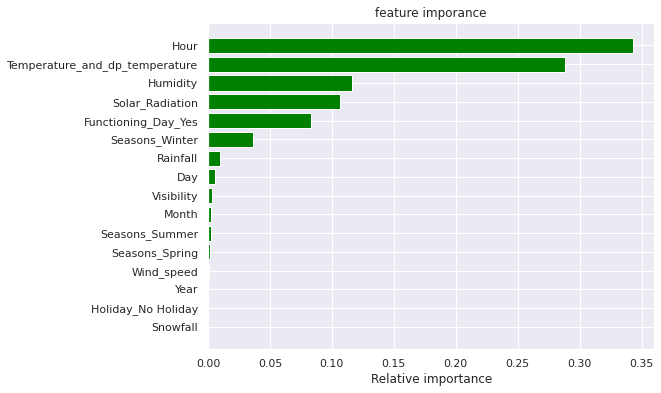

In [ ]:
#bar plot for important features 
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

## Implementing Gradient Boosting Regression

In [ ]:
# gradient boosting model import
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [ ]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8557050771607113
MSE : 61001.9124998751
RMSE : 246.9856524170485
R2 : 0.8557050771607113
Adjusted R2 : 0.8543744035206948


In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8557050771607113
MSE : 67959.97028150507
RMSE : 260.69133142761973
R2 : 0.8249571856578451
Adjusted R2 : 0.823342957975151


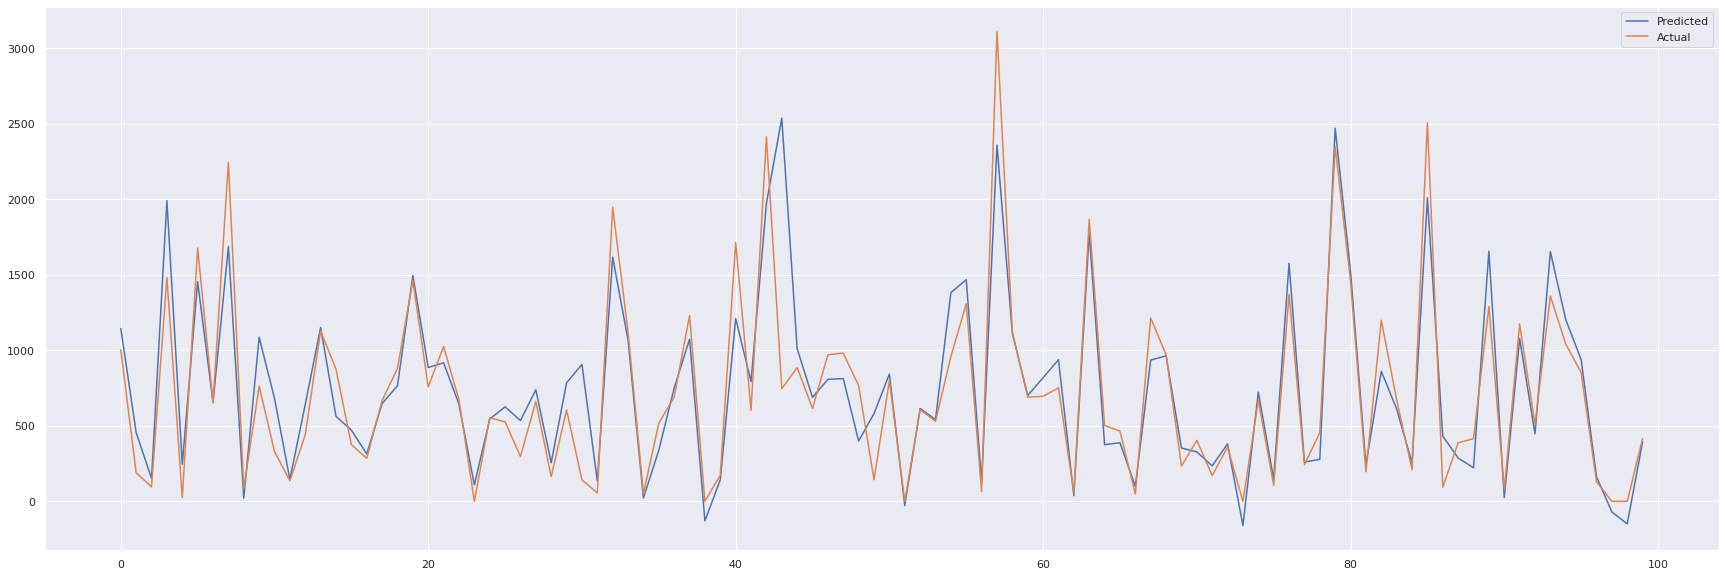

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_gb[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

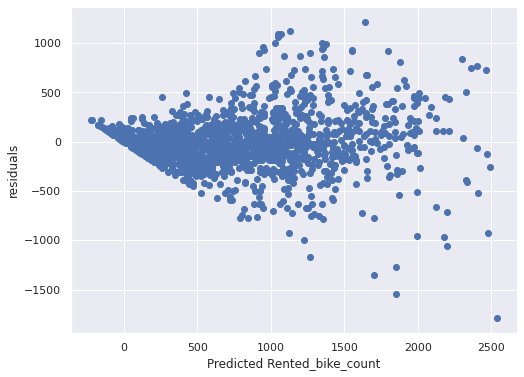

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
#feature importance
gbd_model.feature_importances_

array([3.34274764e-01, 1.02682492e-01, 3.41120931e-04, 2.51060840e-03,
       9.87520036e-02, 3.96741259e-02, 7.13956510e-05, 7.28398887e-03,
       5.52751496e-03, 5.35621785e-05, 2.78412218e-01, 4.40408614e-03,
       7.23158724e-04, 4.39629688e-02, 1.17035879e-03, 8.01556330e-02])

In [ ]:
#creating a data frame for important features
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [ ]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [ ]:
#reading the important features
importance_dfgb.head()

Feature  Feature Importance
0             Hour                0.33
1         Humidity                0.10
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.10

In [ ]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0                             Hour                0.33
10  Temperature_and_dp_temperature                0.28
1                         Humidity                0.10
4                  Solar_Radiation                0.10
15             Functioning_Day_Yes                0.08
5                         Rainfall                0.04
13                  Seasons_Winter                0.04
7                              Day                0.01
8                            Month                0.01
2                       Wind_speed                0.00
3                       Visibility                0.00
6                         Snowfall                0.00
9                             Year                0.00
11                  Seasons_Spring                0.00
12                  Seasons_Summer                0.00
14              Holiday_No Holiday                0.00

In [ ]:
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

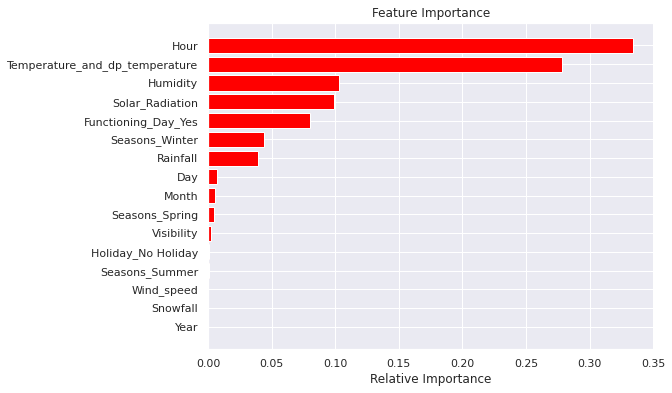

In [ ]:
#plot the feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Implementing Xg Boost

In [ ]:
# Create an instance of the Xgboost Regressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[19:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [ ]:
#xg boost on train data
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61295.43648699404
RMSE : 247.57915196355697
R2 : 0.855010770714616
Adjusted R2 : 0.8536736942485836


In [ ]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 68250.19807949613
RMSE : 261.2473886558412
R2 : 0.8242096530978654
Adjusted R2 : 0.8225885317431483


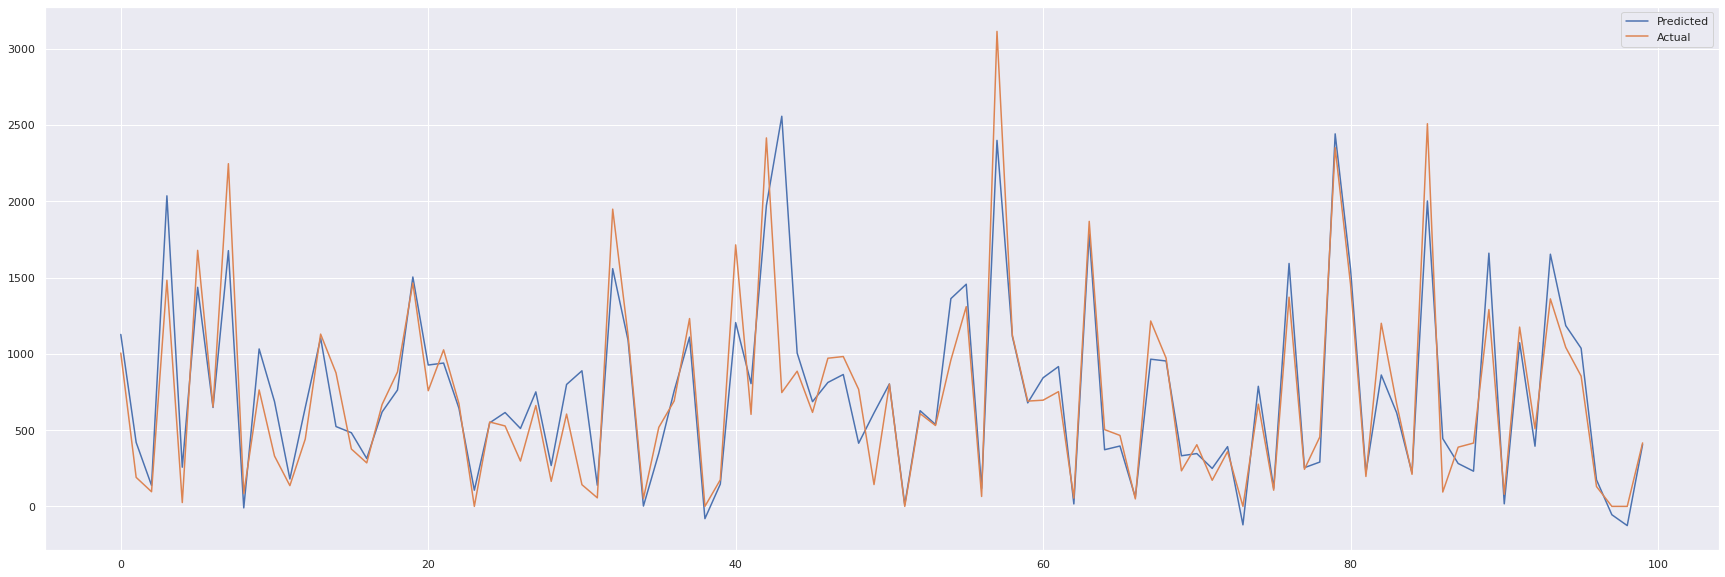

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_xg[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

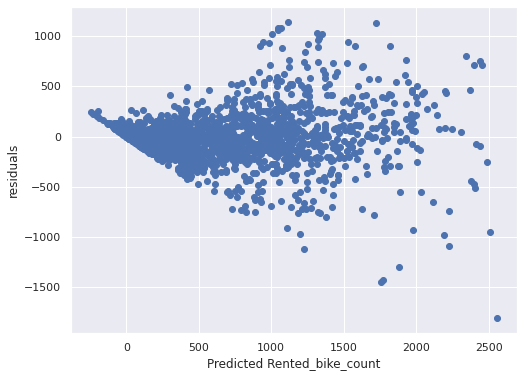

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
xg_model.feature_importances_

array([0.10120562, 0.09605194, 0.00323381, 0.01410358, 0.11835121,
       0.14003982, 0.        , 0.01415665, 0.01956607, 0.00373805,
       0.1368364 , 0.01334193, 0.01041598, 0.16916609, 0.01427021,
       0.1455226 ], dtype=float32)

In [ ]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [ ]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

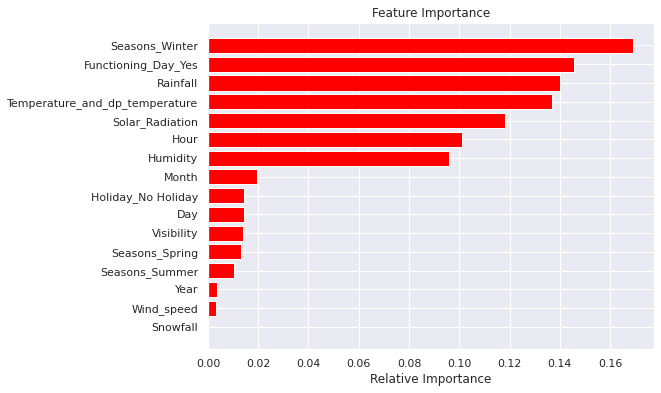

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Implementing GridSearchCV for Xg Boost

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[19:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[19:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[19:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[19:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=40, min_sa

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_xg_g = xg_optimal_model.predict(X_train)
y_pred_test_xg_g  = xg_optimal_model.predict(X_test)

In [ ]:
#Metrics  score of Xg boost for train data
MSE= mean_squared_error(y_train, y_pred_train_xg_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_xg_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 10129.894931552959
RMSE : 100.64737915888799
R2 : 0.9760385806343116
Adjusted R2 : 0.975817610772726


In [ ]:
#Metrics of Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 44752.87633193548
RMSE : 211.54875639420686
R2 : 0.8847311234746039
Adjusted R2 : 0.8836681251896435


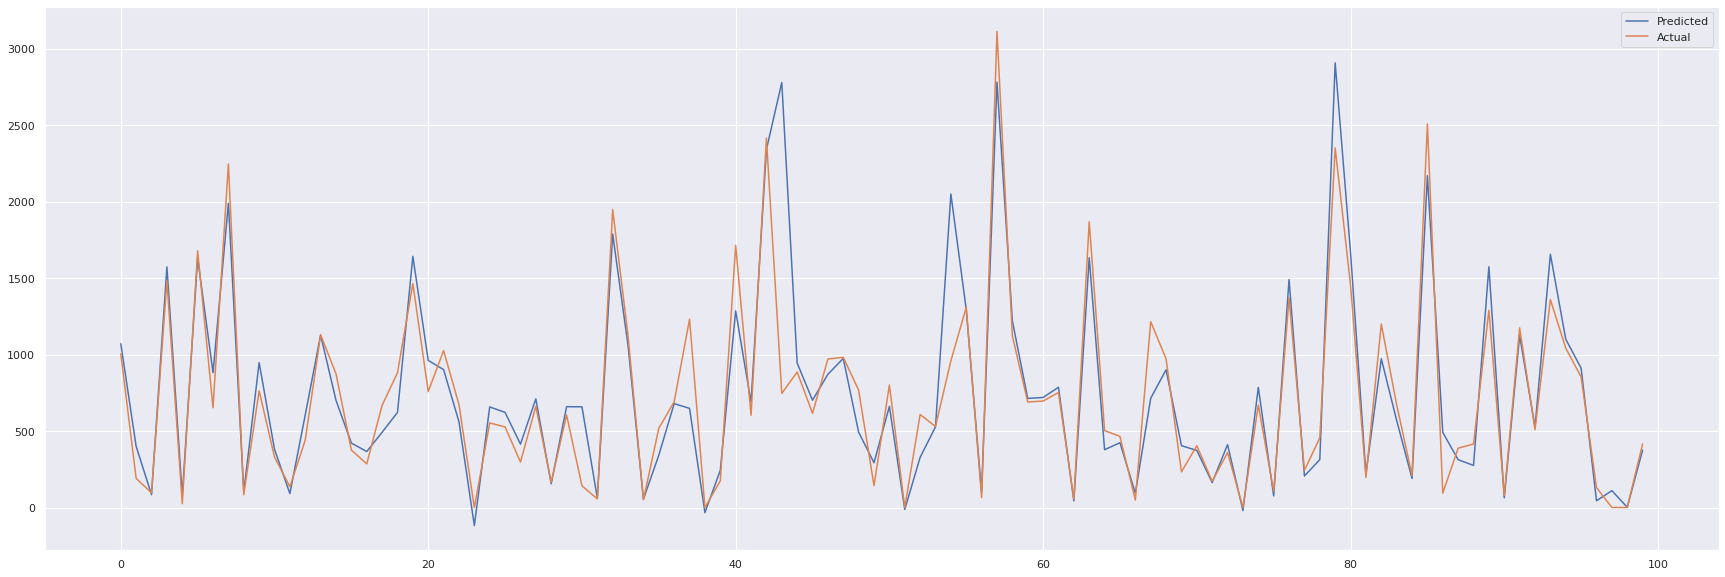

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_xg_g[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

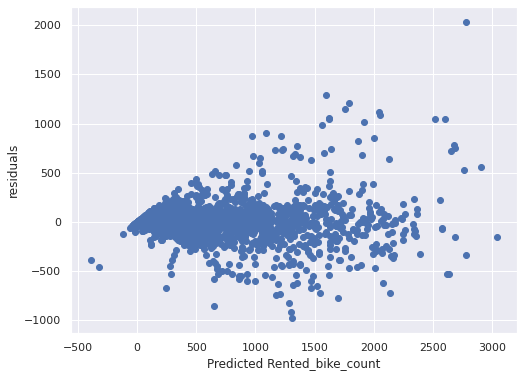

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg_g),(y_pred_test_xg_g)-(y_test))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
#Feature importance
xg_optimal_model.feature_importances_

array([0.073879  , 0.02782162, 0.00351067, 0.00566405, 0.04930649,
       0.07233687, 0.00552861, 0.00786496, 0.00848812, 0.0027236 ,
       0.06255581, 0.01718128, 0.01796046, 0.3560874 , 0.01382628,
       0.27526477], dtype=float32)

In [ ]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [ ]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [ ]:
importance_dfxgt.head()

Feature  Feature Importance
0             Hour                0.07
1         Humidity                0.03
2       Wind_speed                0.00
3       Visibility                0.01
4  Solar_Radiation                0.05

In [ ]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
13                  Seasons_Winter                0.36
15             Functioning_Day_Yes                0.28
0                             Hour                0.07
5                         Rainfall                0.07
10  Temperature_and_dp_temperature                0.06
4                  Solar_Radiation                0.05
1                         Humidity                0.03
11                  Seasons_Spring                0.02
12                  Seasons_Summer                0.02
3                       Visibility                0.01
6                         Snowfall                0.01
7                              Day                0.01
8                            Month                0.01
14              Holiday_No Holiday                0.01
2                       Wind_speed                0.00
9                             Year                0.00

In [ ]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

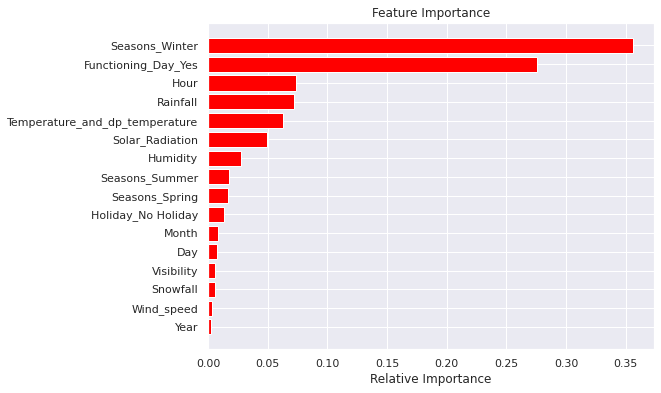

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Summary
___

##For Train Dataset

In [ ]:
from prettytable import PrettyTable
train_data = PrettyTable(['SL NO','MODEL_NAME', 'Train MSE', 'Train RMSE','Train R^2','Train Adjusted R^2'])
train_data.add_row(['1','Linear Regression','190710.62548259995','436.70427692272483','0.5488899632663061','0.5478575271931064'])
train_data.add_row(['2','Lasso Regression','190710.6254850217','436.7042769254976 ','0.5488899632605777','0.5447298707027501'])
train_data.add_row(['3','Ridge Regression','190710.63414152752','436.7042868366734','0.5488899059814547','0.5447298128954048'])
train_data.add_row(['4','ElasticNet Regression','203220.4874674924','450.7998308201683','0.5192989308565615','0.5148659526973137'])
train_data.add_row(['5','DecisionTree Regressor','76328.2706429576','276.27571489900737','0.8194518586133761','0.8177868613441046'])
train_data.add_row(['6','RandomForest Regressor','7014.866722873859','83.75480119296958','0.983406919373109 ','0.9832538996094028'])
train_data.add_row(['7','Gradient Boost','61001.9124998751','246.9856524170485','0.8557050771607113','0.8543744035206948'])
train_data.add_row(['8','Xg Boost','61295.43648699404','247.57915196355697','0.855010770714616','0.8536736942485836'])
print(train_data)

+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |     Train MSE      |     Train RMSE     |     Train R^2      | Train Adjusted R^2 |
+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 190710.62548259995 | 436.70427692272483 | 0.5488899632663061 | 0.5478575271931064 |
|   2   |    Lasso Regression    | 190710.6254850217  | 436.7042769254976  | 0.5488899632605777 | 0.5447298707027501 |
|   3   |    Ridge Regression    | 190710.63414152752 | 436.7042868366734  | 0.5488899059814547 | 0.5447298128954048 |
|   4   | ElasticNet Regression  | 203220.4874674924  | 450.7998308201683  | 0.5192989308565615 | 0.5148659526973137 |
|   5   | DecisionTree Regressor |  76328.2706429576  | 276.27571489900737 | 0.8194518586133761 | 0.8177868613441046 |
|   6   | RandomForest Regressor | 7014.86672287

##For Test DataSet

In [ ]:
test_data = PrettyTable(['SL NO','MODEL_NAME', 'Test MSE', 'Test RMSE','Test R^2','Test Adjusted R^2'])
test_data.add_row(['1','Linear Regression','169871.70934024057','412.15495792267325','0.5624656403341544','0.5584307413401177'])
test_data.add_row(['2','Lasso Regression','169871.72597325977','412.1549781007865','0.5624655974928983','0.5584306981037839'])
test_data.add_row(['3','Ridge Regression','169871.77465071727','412.1550371531534','0.5624654721155751','0.5584305715702432'])
test_data.add_row(['4','ElasticNet Regression','183719.51037262668','428.6251396880807','0.5267982017652659','0.5224343811475394'])
test_data.add_row(['5','DecisionTree Regressor','91626.47632392391','302.6986559664973','0.7639999514779179','0.7618235821543713'])
test_data.add_row(['6','RandomForest Regressor','52363.04539891553','228.8297301464902','0.8651297992599828','0.863886039483706'])
test_data.add_row(['7','Gradient Boost','67959.97028150507','260.69133142761973','0.8249571856578451','0.823342957975151'])
test_data.add_row(['8','Xg Boost','68250.19807949613','261.2473886558412','0.8242096530978654','0.8225885317431483'])
print(test_data)

+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 169871.70934024057 | 412.15495792267325 | 0.5624656403341544 | 0.5584307413401177 |
|   2   |    Lasso Regression    | 169871.72597325977 | 412.1549781007865  | 0.5624655974928983 | 0.5584306981037839 |
|   3   |    Ridge Regression    | 169871.77465071727 | 412.1550371531534  | 0.5624654721155751 | 0.5584305715702432 |
|   4   | ElasticNet Regression  | 183719.51037262668 | 428.6251396880807  | 0.5267982017652659 | 0.5224343811475394 |
|   5   | DecisionTree Regressor | 91626.47632392391  | 302.6986559664973  | 0.7639999514779179 | 0.7618235821543713 |
|   6   | RandomForest Regressor | 52363.0453989

#Conclusion :

* As it was stated in the problem, rented bike count was low in 2017 untill november. After that rented bike count started increasing.

* There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018.

* Bike count rent is highly correlated with 'Hour', which seems obvious. Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

* After doing exploratory data analysis, applying Linear Regression model didn't go quite well as it gave only 56% accuracy.

* Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. with Lasso, ridge and ElasticNet regressor We got r squared value of 0.5624, 0.5624, 0.5267 respectively.

* With Decision Tree we are able to achieve the r2 score of 0.7639.

* Gradient Boost gave r squared value of 0.8249 on test data.

* XG Boost gave r squared value of 0.8242

* RandomForest Regressor gives higher value of R squared metric in train data  0.9834 and on test data it is 0.8651

* RandomForest Regressor came with best accuracy to approximate numbers of rented bikes demand. It gives amazing results of training r-square at 0.9834 and test r-square value at 0.8651 also with adjusted r-square with 0.8638.